#Dataset Description

Domain: Diabetes

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.


 In particular, all patients here are females at least 21 years old of Pima Indian heritage.
The datasets consist of several medical predictor variables and one target variable (Outcome) Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age etc and the class variable is (Outcome)


•	Pregnancies: Number of times pregnant
•	Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
•	BloodPressure: Diastolic blood pressure (mm Hg)
•	SkinThickness: Triceps skin fold thickness (mm)
•	Insulin: 2-Hour serum insulin (mu U/ml)
•	BMI: Body mass index (weight in kg/(height in m)^2)
•	DiabetesPedigreeFunction: Diabetes pedigree function
•	Age: Age (years)
•	Outcome: Class variable (0 or 1)


#LAB1: EDA

#Importing the nessecary libraries

In [ ]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
from scipy import stats
import plotly.express as ex

In [ ]:
#importing neccessary libraries
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns


#Data collection

In [ ]:
df = pd.read_csv('/content/diabetes.csv')

#Basic commands

In [ ]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
df.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [ ]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
print("Dataset has {} rows and {} columns ". format(df.shape[0], df.shape[1]))

Dataset has 768 rows and 9 columns 


In [ ]:
df.size

6912

In [ ]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

#Checking for null or missing values

In [ ]:
df.nunique(axis=0)

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There is no null or missing values therefore no need to fill the missing values using any central tendencies(mean, median, mode)
Note: if the dataset is not normally distributed(distplot) then use median to fill the missing values

#Checking for class imbalance

In [ ]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

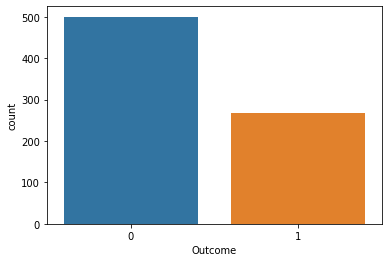

In [ ]:
sns.countplot(x='Outcome', data=df)
#Slight imbalance in dataset is observed using countplot

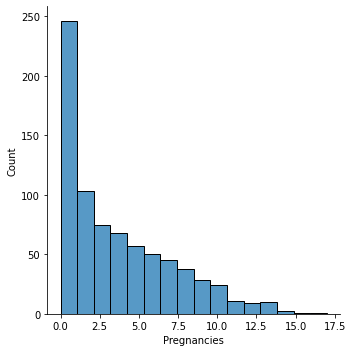

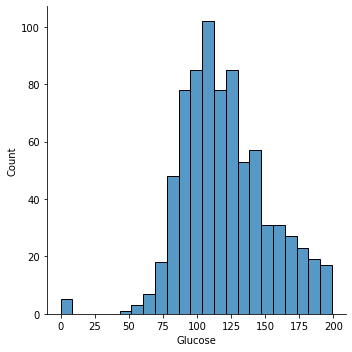

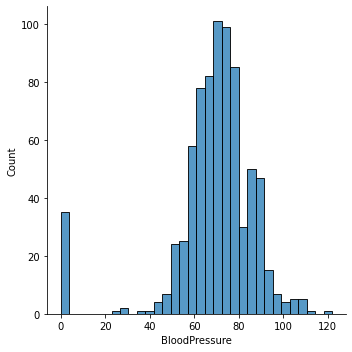

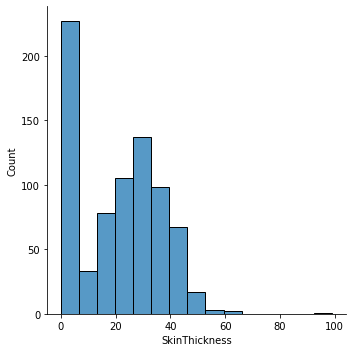

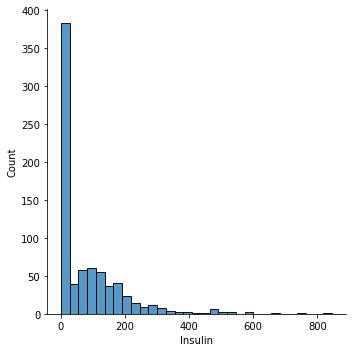

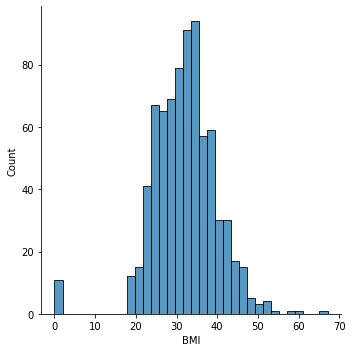

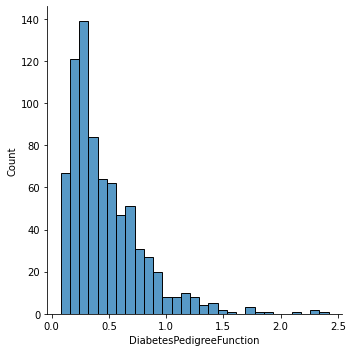

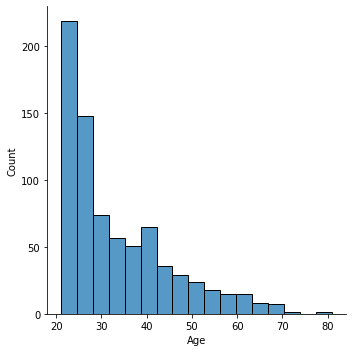

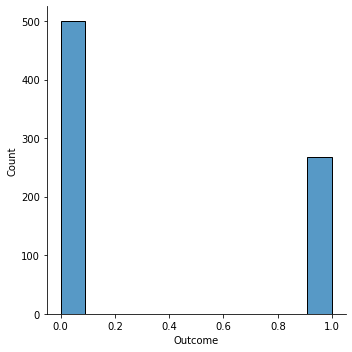

In [ ]:
# creating a for loop to get the distribution plot for all columns
for column in df:
  sns.displot(x=column, data=df)
#skewness can be observed in each plots as most of the features are either rightly skewed or leftly skewed
#BMI column values are normally distributed across the plot


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


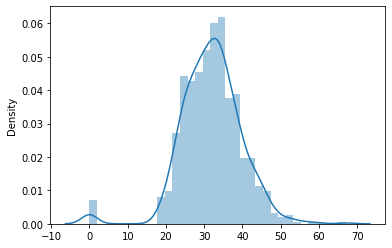

In [ ]:
sns.distplot(x=df.BMI)

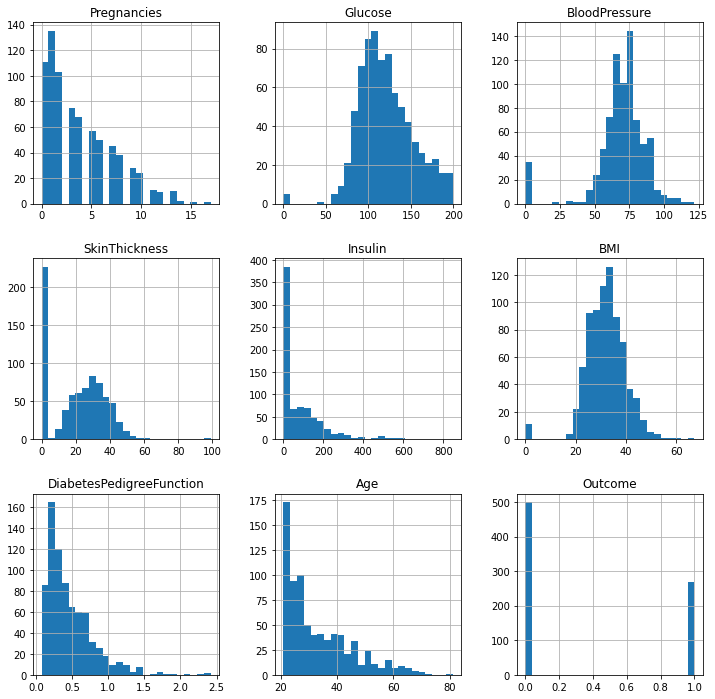

In [ ]:

# plotting histogram of all availble columns in the dataset to visualise data. 
axList = df.hist(bins=25, figsize = (12, 12))

In [ ]:
tmc = df['BMI']
tcc = df['Age']

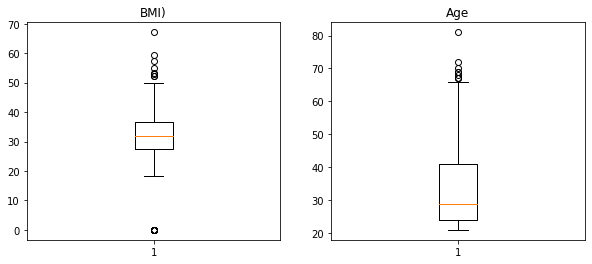

In [ ]:
# to find variation of the total amount change between Q1 and Q4 and to find total transaction count change with the help of boxplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 4))

ax1.boxplot(tmc)
ax1.set_title('BMI)')
ax2.boxplot(tcc)
ax2.set_title('Age')
plt.show()

In [ ]:
# seeing amount of correlation of each attribute with respect to every other attribute
df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


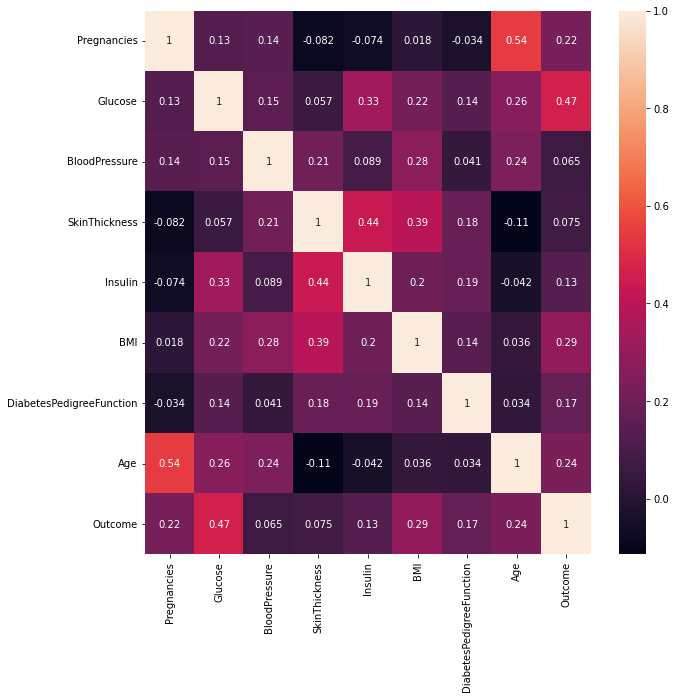

In [ ]:
# heatmap with the help of correlated data 
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

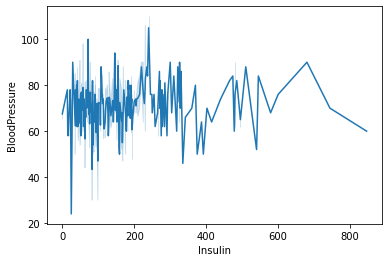

In [ ]:
# lineplot is plotted by aggregating the means of various y values over each x value and is then plotted as line grsph. The shadow around the line represents the confidence lveel of the line.
sns.lineplot(data=df, x="Insulin", y="BloodPressure")

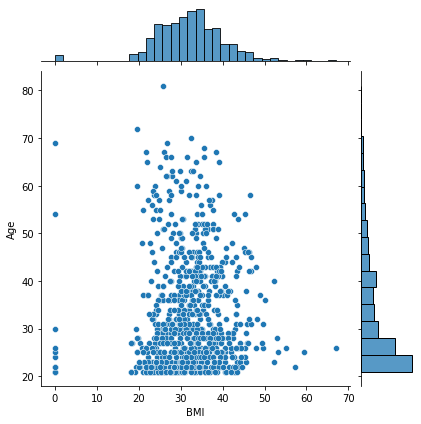

In [ ]:
 # displays relationship between the variables as well as the univariate graph
sns.jointplot(data=df, x="BMI", y="Age")

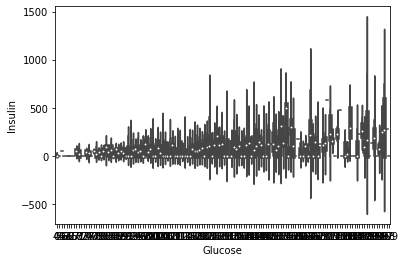

In [ ]:
# shows distribution of samples. here, most of the total transaction amount of blue card holders are centered around the median while platinum is more evenly distributed.
sns.violinplot(data=df, x="Glucose", y="Insulin")

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer = imputer.fit(df[['BMI']])
df['BMI'] = imputer.transform(df[['BMI']])
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

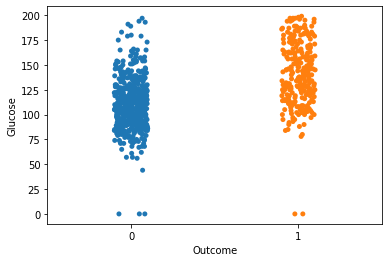

In [ ]:
# Can be observed that blue card holder utilse the most followed by silver card, gold and finally platinum
sns.stripplot(data=df,x='Outcome', y='Glucose')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


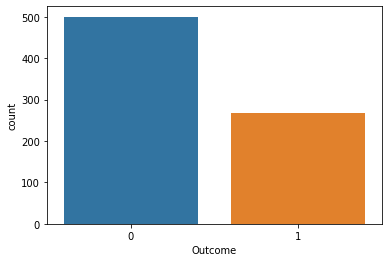

In [ ]:
import seaborn as sns
from itertools import cycle
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

sns.countplot(df['Outcome'])
plt.show()

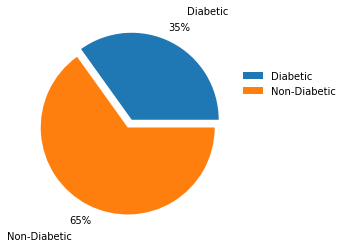

In [ ]:
fig, ax = plt.subplots()

labels = ['Diabetic', 
         'Non-Diabetic']
percentages = [34.89, 65.10]
explode=(0.1,0)
ax.pie(percentages, explode=explode, labels=labels, autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

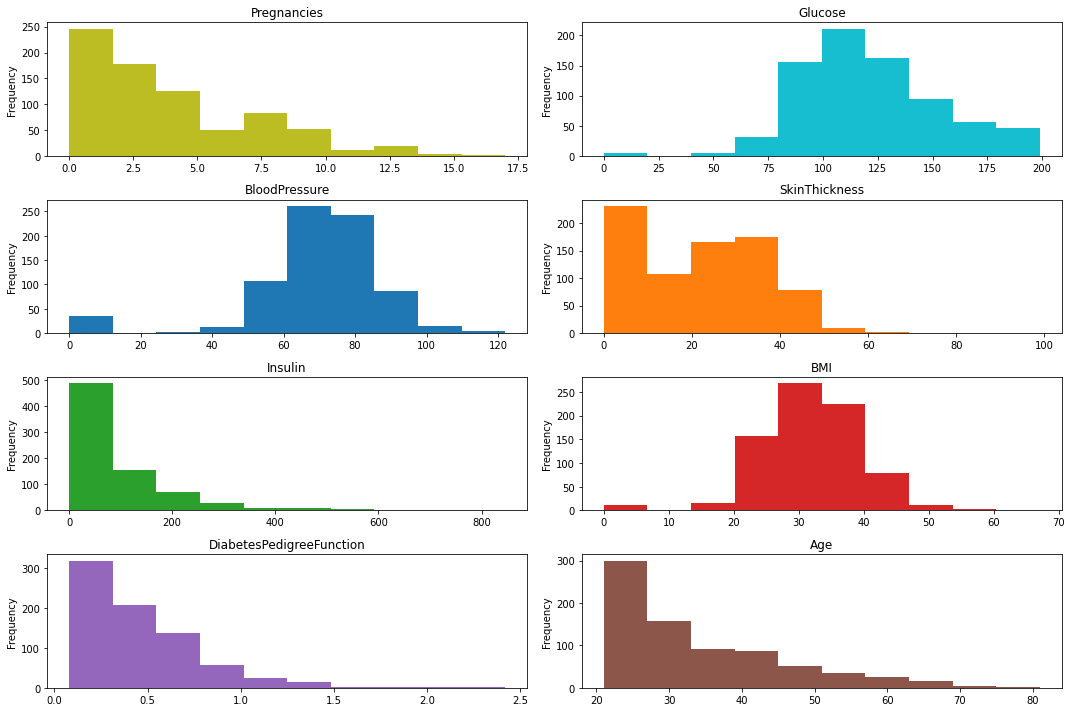

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(15, 10))
axes = axes.flatten()
ax_idx = 0
columns = df.drop('Outcome', axis = 1).columns
for col in columns:
    df[col].plot(kind = 'hist', ax = axes[ax_idx], title = col, color = next(color_cycle))
    ax_idx += 1

plt.tight_layout()
plt.show()

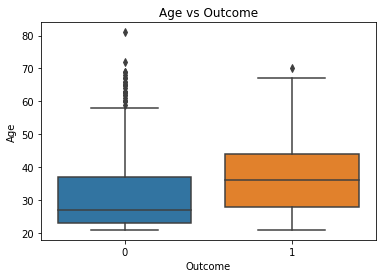

In [ ]:
sns.boxplot(x = 'Outcome', y = 'Age', data = df)
plt.title('Age vs Outcome')
plt.show()

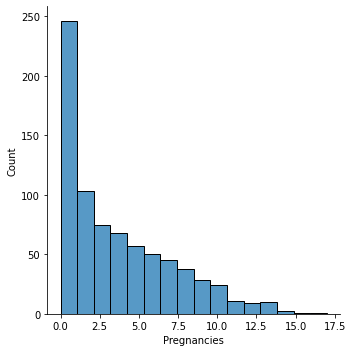

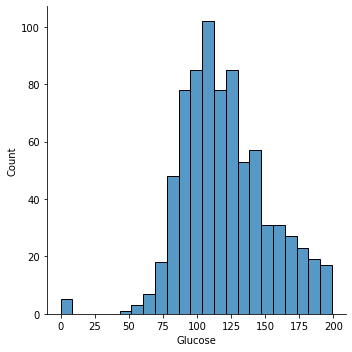

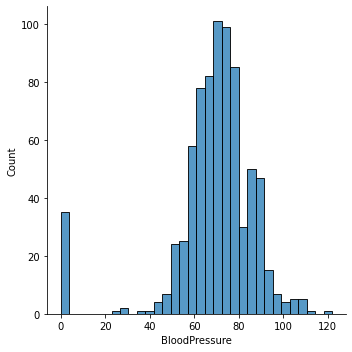

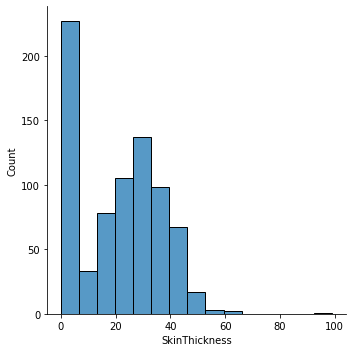

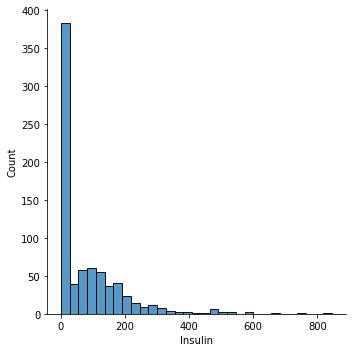

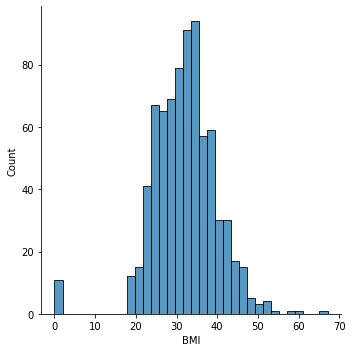

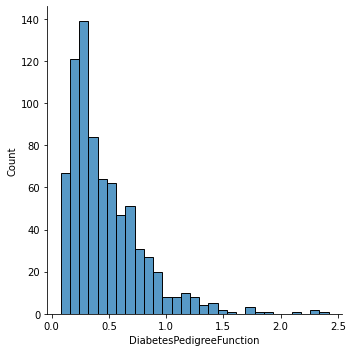

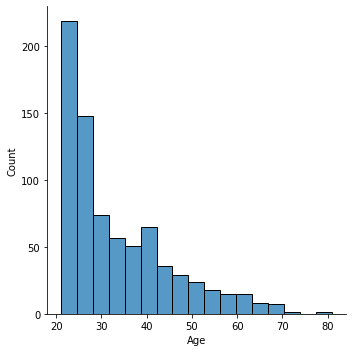

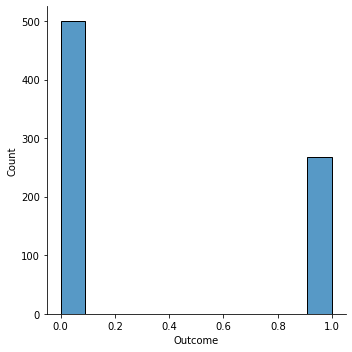

In [ ]:
# creating a for loop to get the distribution plot for all columns
for column in df:
  sns.displot(x=column, data=df)

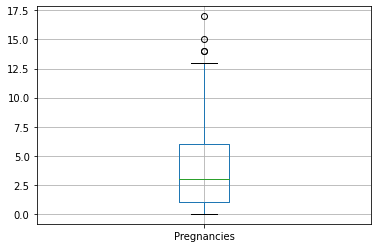

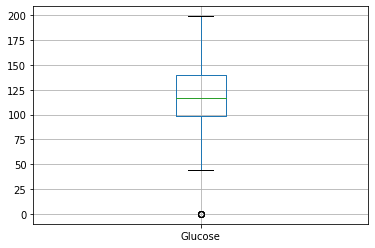

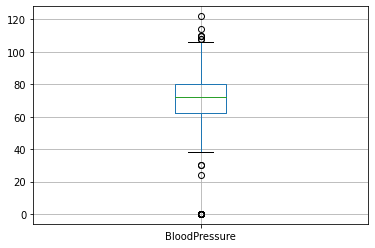

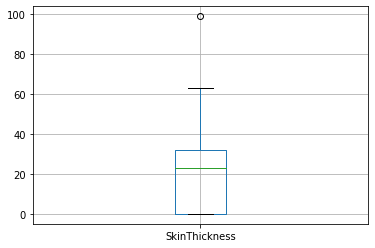

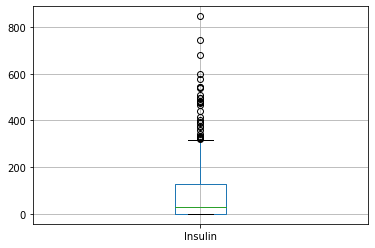

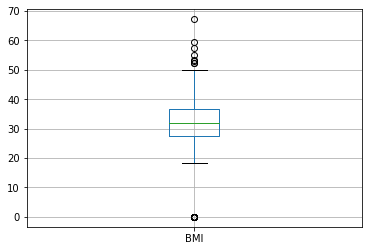

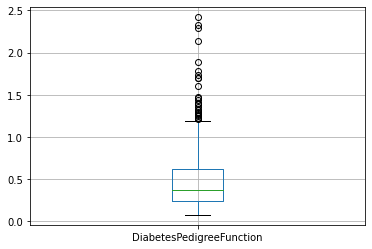

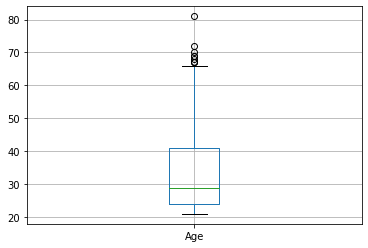

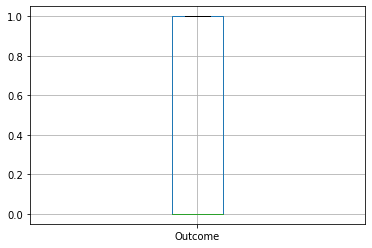

In [ ]:
 for column in df:
    plt.figure()
    df.boxplot([column])

**Inference from EDA & Data Visualization:** 
1. No missing Values
2. All are continuous numerical values except for Outcome column
3. Mean is slightly more than the median for most of the features. So it is right skewed.
4. Slight imbalance in the dataset ( cases for non diabetic and diabetic category)
5. Most of the features have Outliers
7. Correlation Matrix reveal that bloodpressure and insulin are positive correlated whereas bmi and cholestral are positively correlated.


LAB2: KNN

Diabetes Dataset



In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.metrics import mean_absolute_error,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score

In [ ]:
#Displaying first few columns
data = pd.read_csv('diabetes.csv')
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
#Q1) Identifying unique values
data.nunique(axis=0)

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [ ]:
#Q2) Finding Missing values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#Q3) Replace columns like [Gluscose,BloodPressure,SkinThickness,BMI,Insulin] with Zero as values with mean of respective column
zero_not_accepted = ['Glucose','BloodPressure','SkinThickness','BMI','Insulin']

for col in zero_not_accepted:
    data[col]= data[col].replace(0,np.NaN)
    mean = int(data[col].mean(skipna=True))
    data[col] = data[col].replace(np.NaN,mean)


In [ ]:
#Extracting independent variables
X = data.iloc[:,0:8]

In [ ]:
#Extracting dependent variables
y = data.iloc[:,8]

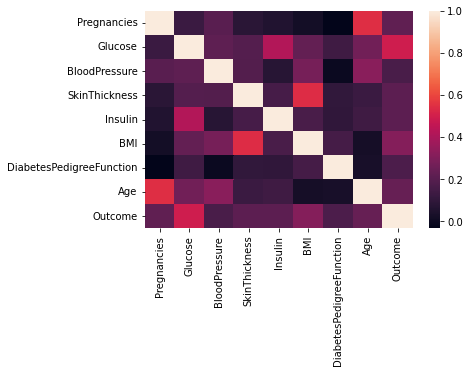

In [ ]:
#Data Visualization before data pre processing
sns.heatmap(data.corr())

In [ ]:
#Splitting dataset into training and testing set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
classifier = KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)


In [ ]:
#Normalizing the data using standard scaler or minmax scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#6. Display the confusion matrix, accuracy measures, classification report.
#7. Provide appropriate inference for every task performed.

5.Apply KNN for the preprocessed dataset use 5 different K Values and 3 different distance measures


In [ ]:
# p=1 manhattan
# p=2 euclidean
# no p minkowski

In [ ]:
from sklearn.metrics import accuracy_score
knn_model = KNeighborsClassifier(n_neighbors=20,p=1).fit(X_train,y_train)
knn_pred = knn_model.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print(acc)

0.8181818181818182


In [ ]:
from sklearn.metrics import accuracy_score
knn_model = KNeighborsClassifier(n_neighbors=19,p=1).fit(X_train,y_train)
knn_pred = knn_model.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print(acc)

0.8181818181818182


In [ ]:
from sklearn.metrics import accuracy_score
knn_model = KNeighborsClassifier(n_neighbors=30,p=2).fit(X_train,y_train)
knn_pred = knn_model.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print(acc)

0.8181818181818182


In [ ]:
from sklearn.metrics import accuracy_score
knn_model = KNeighborsClassifier(n_neighbors=7).fit(X_train,y_train)
knn_pred = knn_model.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print(acc)

0.8181818181818182


In [ ]:
#loading model KNN
classifier = KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')

In [ ]:
#fitting model
classifier.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [ ]:
#making prediction
y_pred = classifier.predict(X_test)

In [ ]:
#evaluating model using confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)
print(f1_score(y_test,y_pred))


[[94 13]
 [15 32]]
0.6956521739130436


In [ ]:
#Acuuracy score
print(accuracy_score(y_test,y_pred))

0.8181818181818182


In [ ]:
#classification report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.86      0.88      0.87       107
           1       0.71      0.68      0.70        47

    accuracy                           0.82       154
   macro avg       0.79      0.78      0.78       154
weighted avg       0.82      0.82      0.82       154



Text(0.5, 15.0, 'Predicted label')

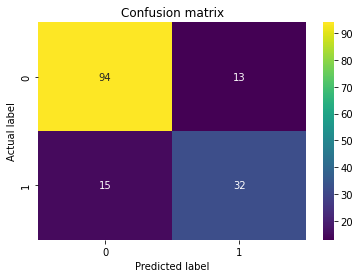

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


#Interpretation
After performing the KNN algorithm on diabetes dataset we observe that we have got almost 81 % accuracy and inference from the confusiion matrix that almost 126 values have been correctly predicted using knnn.
Thus we can understand that almost 81% values of datapoints can be correctly predicted for diabetes dataset using Knn Algorithm

LAB3: Naive Bayes



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
dataset = pd.read_csv('diabetes.csv')
print(dataset.describe())
X = dataset.iloc[:, 0:8]
y = dataset.iloc[:, 8]

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [ ]:
#Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.20)


In [ ]:
#Feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
#Implement the classifier
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
#Predicting
y_pred = classifier.predict(X_test)


In [ ]:
#Confusion matrix and accuracy 
cm = confusion_matrix(y_test, y_pred)
print (cm)
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[93 14]
 [18 29]]
0.6444444444444444
0.7922077922077922


Text(0.5, 15.0, 'Predicted label')

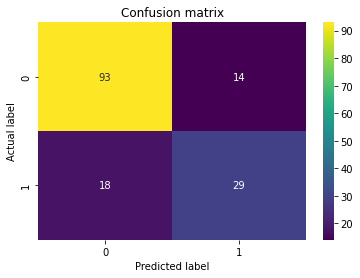

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


#Interpretation
After performing the Naive bayes algorithm on diabetes dataset we observe that we have got almost 79 % accuracy and inference from the confusiion matrix that almost 122 values have been correctly predicted using Naive Bayes.
Thus we can understand that almost 79% values of datapoints can be correctly predicted for diabetes dataset using Naive bayes Algorithm.
By comparitively undertanding knn and naive bayes we can conclude that knn is better predicted as its accuracy is 81% than naive bayes whose accuracy is jut 79%

#K means clustering diabetes dataset

In [ ]:
#importing required libraries & dataset for the project
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn import datasets

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [ ]:
data = pd.read_csv("./data.csv")   #importing files using pandas
data.head(10)    #shows top 10 dataset items

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

In [ ]:
# Dataset dimensions - (rows, columns)
data.shape

(768, 9)

In [ ]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [ ]:
data.isnull().sum()        

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
print(data.groupby('Outcome').size())   #categorizes data based on Outcomes 

Outcome
0    500
1    268
dtype: int64


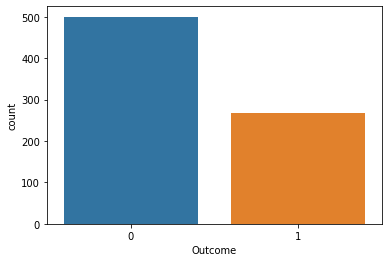

In [ ]:
# Outcome countplot (visualizing in bar graph)
import seaborn as sns
sns.countplot(x = 'Outcome',data = data)

# Observations:

    1. There are a total of 768 records and 9 features in the dataset.
    2. Each feature can be either of integer or float dataype.
    3. Some features like Glucose, Blood pressure , Insulin, BMI have zero values which represent missing data.
    4. There are zero NaN values in the dataset.
    5. In the outcome column, 1 represents diabetes positive and 0 represents diabetes negative.



In [ ]:
#Data preprocessing
#visualize columns
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
dataset_new = data

In [ ]:
# Replacing zero values with NaN
dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN) 

In [ ]:
# Count of NaN
dataset_new.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
  # Replacing NaN with mean values
  dataset_new["Glucose"].fillna(dataset_new["Glucose"].mean(), inplace = True)
  dataset_new["BloodPressure"].fillna(dataset_new["BloodPressure"].mean(), inplace = True)
  dataset_new["SkinThickness"].fillna(dataset_new["SkinThickness"].mean(), inplace = True)
  dataset_new["Insulin"].fillna(dataset_new["Insulin"].mean(), inplace = True)
  dataset_new["BMI"].fillna(dataset_new["BMI"].mean(), inplace = True)

This estimator MinMaxScaler Scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

In [ ]:
# Feature scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataset_scaled = sc.fit_transform(dataset_new)

In [ ]:
data1 = pd.DataFrame(dataset_scaled)
data1

0         1         2         3         4         5         6  \
0    0.352941  0.670968  0.489796  0.304348  0.170130  0.314928  0.234415   
1    0.058824  0.264516  0.428571  0.239130  0.170130  0.171779  0.116567   
2    0.470588  0.896774  0.408163  0.240798  0.170130  0.104294  0.253629   
3    0.058824  0.290323  0.428571  0.173913  0.096154  0.202454  0.038002   
4    0.000000  0.600000  0.163265  0.304348  0.185096  0.509202  0.943638   
..        ...       ...       ...       ...       ...       ...       ...   
763  0.588235  0.367742  0.530612  0.445652  0.199519  0.300613  0.039710   
764  0.117647  0.503226  0.469388  0.217391  0.170130  0.380368  0.111870   
765  0.294118  0.496774  0.489796  0.173913  0.117788  0.163599  0.071307   
766  0.058824  0.529032  0.367347  0.240798  0.170130  0.243354  0.115713   
767  0.058824  0.316129  0.469388  0.260870  0.170130  0.249489  0.101196   

            7    8  
0    0.483333  1.0  
1    0.166667  0.0  
2    0.183333  1.0  
3    0.000000  0.0  
4    0.200000  1.0  
..        ...  ...  
763  0.700000  0.0  
764  0.100000  0.0  
765  0.150000  0.0  
766  0.433333  1.0  
767  0.033333  0.0  

[768 rows x 9 columns]

A heatmap is a graphical representation of data that uses a system of color-coding to represent different values.

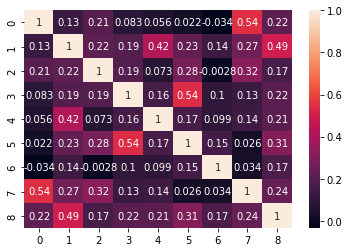

In [ ]:
# Heatmap
sns.heatmap(data1.corr(), annot = True)
plt.show()

# Observations:

    1.The countplot tells us that the dataset is imbalanced, as number of patients who don't have diabetes is more than those who do.
    2.From the correaltion heatmap, we can see that there is a high correlation between Outcome and [Glucose,BMI,Age]. We can select these features to accept input from the user and predict the outcome.



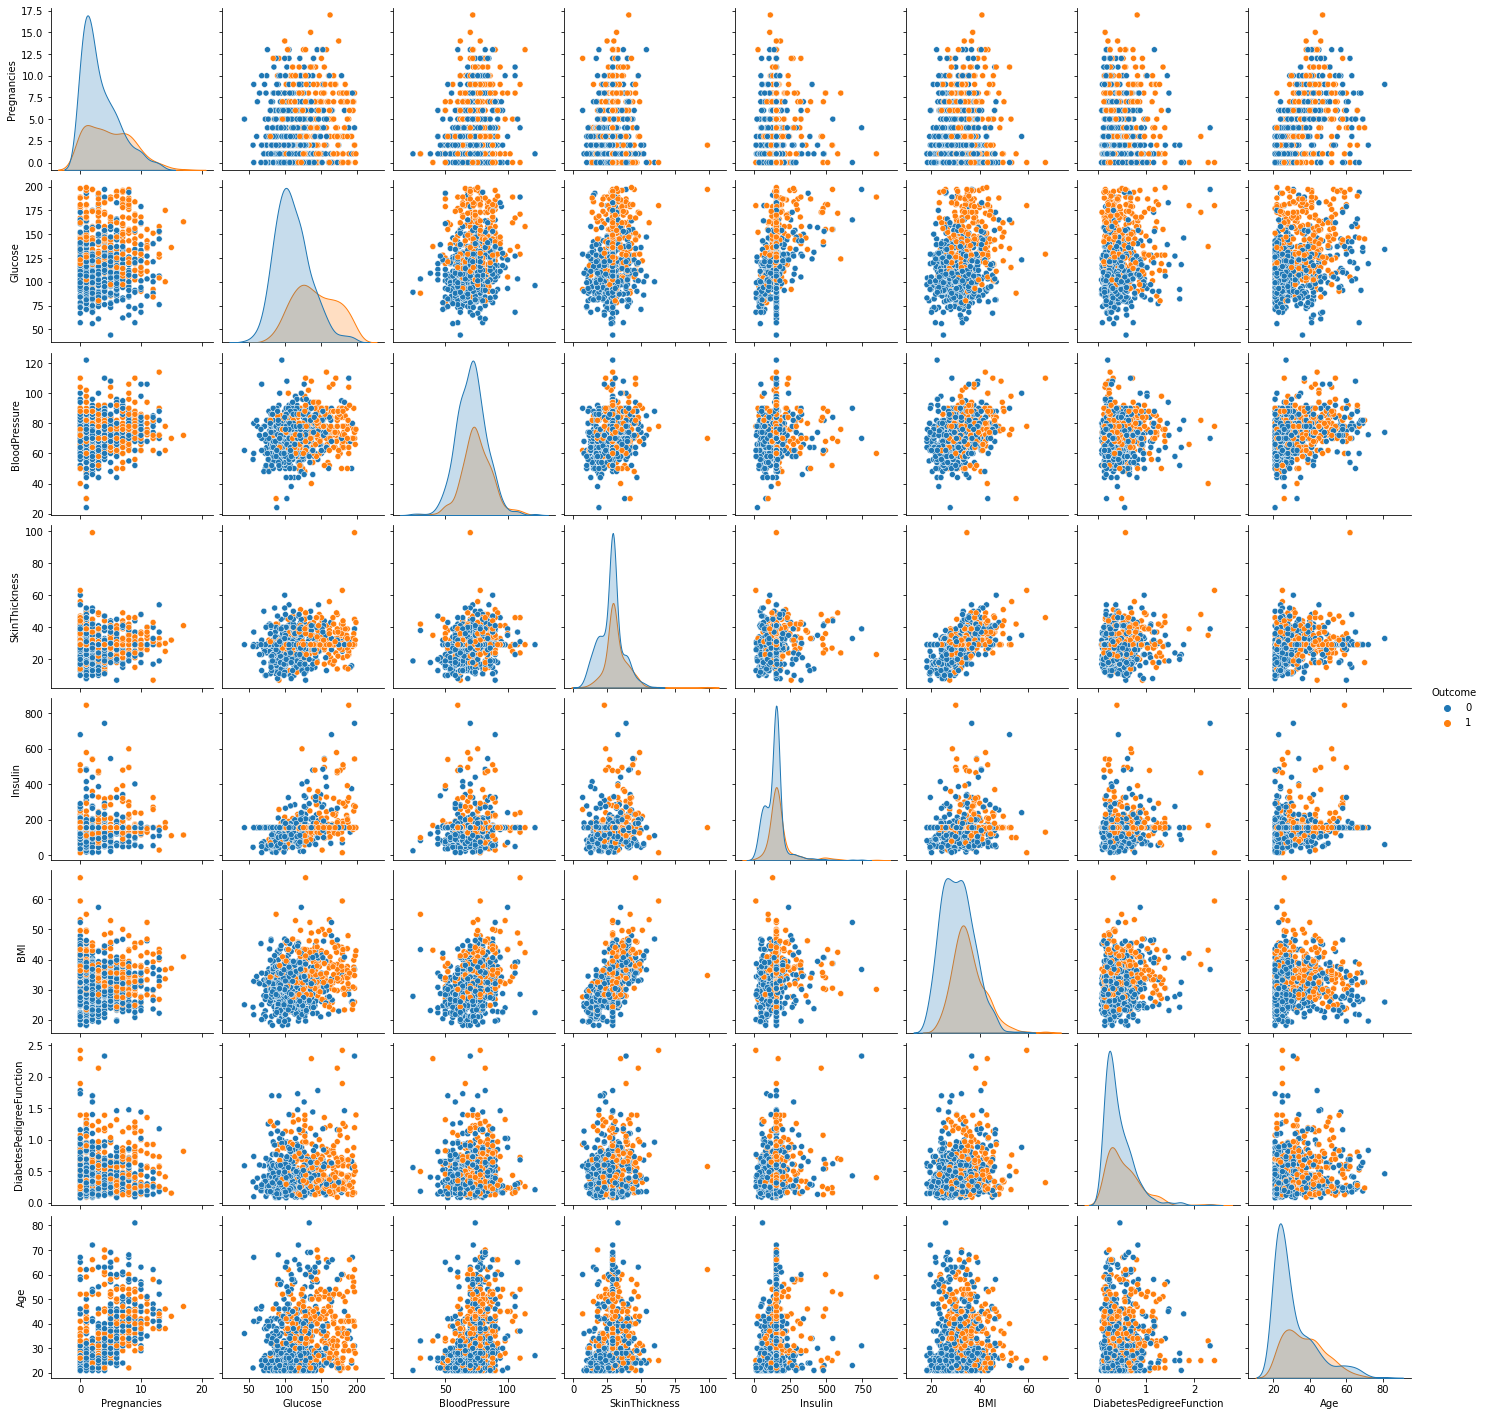

In [ ]:
# Detailed distribution of the features in the dataset
sns.pairplot(data=data, hue='Outcome')
plt.show()

In [ ]:
#Using elblow method to find the best value of k

## STEPS OF CHOOSING BEST K VALUE

    1. Run k-means clustering model on various values of k 
    2. For each value of K, calculate the Sum of squares of distances of every data point from its corresponding cluster centroid which is called WCSS ( Within-Cluster Sums of Squares)
    3. Plot the value of WCSS with respect to various values of K
    4. To select the value of k, we choose the value where there is bend (knee) on the plot i.e. WCSS isn’t increasing rapidly.

## Since we need to cluster diabetes & Non Diabetes, cluster = 2 for our problem Scenario

<div style="background-color: green;text-align:center;padding: 20px;font-size: 16px;color:white;">
FITTING THE MODEL (K=2)- KMEANS CLUSTERING
</div>

In [ ]:
# Selecting features - [Glucose, Insulin, BMI]
X = data1.iloc[:, [1, 4, 5]].values
Y = data1.iloc[:, 8].values

In [ ]:
# Splitting X and Y
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, stratify = dataset_new['Outcome'] )

In [ ]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (614, 3)
X_test shape: (154, 3)
Y_train shape: (614,)
Y_test shape: (154,)


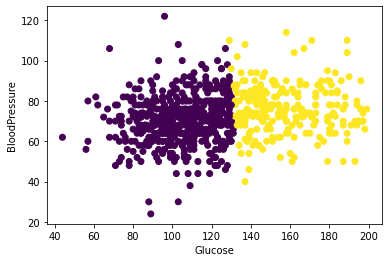

In [ ]:
# data2 create
data2 = data.loc[:, ['Glucose', 'BloodPressure']]
# KMEANS 2
kmeans2 = KMeans(n_clusters=2)
kmeans2.fit(data2)
labels2 = kmeans2.predict(data2)

# visualization
plt.scatter(data['Glucose'], data['BloodPressure'], c = labels2)
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')
plt.show()

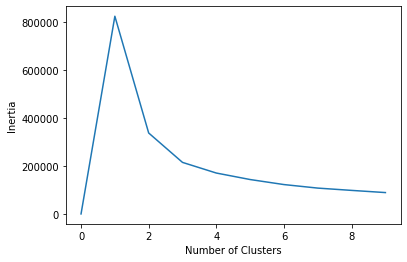

In [ ]:
iner_list = np.empty(10)
for i in range(1,10):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(data2)
    iner_list[i] = kmeans2.inertia_

# iner_list = iner_list%100
# show the best number in graph
plt.plot(range(0,10), iner_list,'-')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

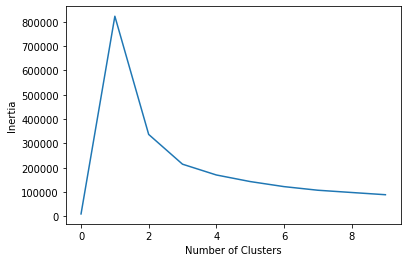

In [ ]:
iner_list = np.empty(10)
for i in range(1,10):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(data2)
    iner_list[i] = kmeans2.inertia_

# iner_list = iner_list%100
# show the best number in graph
plt.plot(range(0,10), iner_list,'-')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [ ]:
import sklearn
from sklearn.cluster import KMeans
KMeans_Clustering = KMeans(n_clusters =2, random_state=0)
KMeans_Clustering.fit(X_train)

KMeans(n_clusters=2, random_state=0)

In [ ]:
print(KMeans_Clustering.cluster_centers_)

[[0.71411853 0.21796168 0.35414063]
 [0.38662377 0.13804041 0.25757952]]


In [ ]:
#prediction using kmeans and accuracy
kpred = KMeans_Clustering.predict(X_test)

print('Classification report:\n\n', sklearn.metrics.classification_report(Y_test,kpred))

Classification report:

               precision    recall  f1-score   support

         0.0       0.44      0.24      0.31       100
         1.0       0.23      0.43      0.30        54

    accuracy                           0.31       154
   macro avg       0.33      0.33      0.31       154
weighted avg       0.36      0.31      0.31       154



Confusion Matrix :


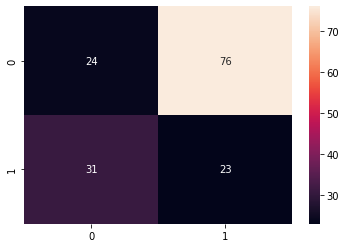

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
print("Confusion Matrix :")
outcome_labels = sorted(data.Outcome.unique())
sns.heatmap(
    confusion_matrix(Y_test, kpred),
    annot=True,
    xticklabels=outcome_labels,
    yticklabels=outcome_labels
)

<div style="background-color: green;text-align:center;padding: 20px;font-size: 16px;color:white;">
PREDICTION ON NEW DATA
</div>

In [ ]:
#print("all data must be entered in 0-1 range")
#G= input("enter Glucose level : ")
#B = input("enter BMI level : " )
#A= input("enter Age : ")
#out = KMeans_Clustering.predict([[G,B,A]])

out = KMeans_Clustering.predict([[0.53,0.54,0.5253]])
if (out==0):
    print("No Diabetes")
else:
    print("Diabetes")


No Diabetes


<div style="background-color:red;text-align:center;padding: 20px;font-size: 16px;color:white;">
ACTUAL CLUSTER
</div>

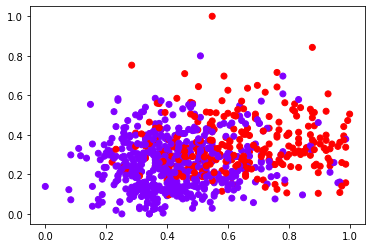

In [ ]:
plt.scatter(data1.iloc[:, [1]].values,data1.iloc[:, [5]].values, c=data['Outcome'], cmap='rainbow')

<div style="background-color: yellow;text-align:center;padding: 20px;font-size: 16px;color:black;">
PREDICTED CLUSTER
</div>

In [ ]:
import sklearn
from sklearn.cluster import KMeans
KMeans_Clustering = KMeans(n_clusters =2, random_state=0)
KMeans_Clustering.fit(X)

KMeans(n_clusters=2, random_state=0)

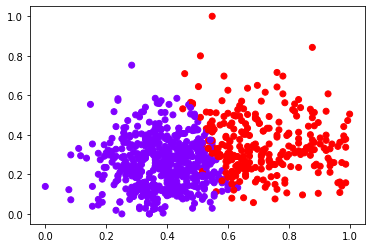

In [ ]:
plt.scatter(data1.iloc[:, [1]].values,data1.iloc[:, [5]].values, c=KMeans_Clustering.labels_, cmap='rainbow')

#Interpretation

 1. There are a total of 768 records and 9 features in the dataset.
    2. Each feature can be either of integer or float dataype.
    3. Some features like Glucose, Blood pressure , Insulin, BMI have zero values which represent missing data.
    4. There are zero NaN values in the dataset.
    5. In the outcome column, 1 represents diabetes positive and 0 represents diabetes negative.
  6. The countplot tells us that the dataset is imbalanced, as number of patients who don't have diabetes is more than those who do.
  7. From the correaltion heatmap, we can see that there is a high correlation between Outcome and [Glucose,BMI,Age]. We can select these features to accept input from the user and predict the outcome.
  8. Relatively simple to learn and understand as the algorithm solely depends on the euclidean method of distance calculation. 
  9. K means works on minimizing Sum of squares of distances, hence it guarantees convergence. Computational cost is O(K*n*d), hence K means is fast and efficient

#Hierarchical Clustering on diabetes datset

In [ ]:
#importing required libraries & dataset for the project
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn import datasets

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [ ]:
data = pd.read_csv("./data.csv")   #importing files using pandas
data.head(10)    #shows top 10 dataset items

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

In [ ]:

# Dataset dimensions - (rows, columns)
data.shape

(768, 9)

In [ ]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [ ]:
data.isnull().sum()        

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
print(data.groupby('Outcome').size())   #categorizes data based on Outcomes 

Outcome
0    500
1    268
dtype: int64


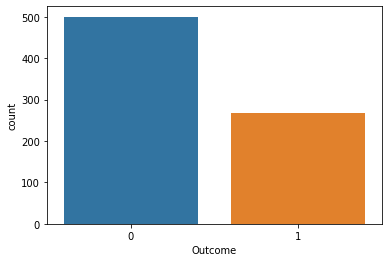

In [ ]:
# Outcome countplot (visualizing in bar graph)
import seaborn as sns
sns.countplot(x = 'Outcome',data = data)

In [ ]:
#Data preprocessing
#visualize columns
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
dataset_new = data

In [ ]:
# Replacing zero values with NaN
dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN) 

In [ ]:
# Count of NaN
dataset_new.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
  # Replacing NaN with mean values
  dataset_new["Glucose"].fillna(dataset_new["Glucose"].mean(), inplace = True)
  dataset_new["BloodPressure"].fillna(dataset_new["BloodPressure"].mean(), inplace = True)
  dataset_new["SkinThickness"].fillna(dataset_new["SkinThickness"].mean(), inplace = True)
  dataset_new["Insulin"].fillna(dataset_new["Insulin"].mean(), inplace = True)
  dataset_new["BMI"].fillna(dataset_new["BMI"].mean(), inplace = True)

In [ ]:
# Feature scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataset_scaled = sc.fit_transform(dataset_new)

In [ ]:
data1 = pd.DataFrame(dataset_scaled)
data1

0         1         2         3         4         5         6  \
0    0.352941  0.670968  0.489796  0.304348  0.170130  0.314928  0.234415   
1    0.058824  0.264516  0.428571  0.239130  0.170130  0.171779  0.116567   
2    0.470588  0.896774  0.408163  0.240798  0.170130  0.104294  0.253629   
3    0.058824  0.290323  0.428571  0.173913  0.096154  0.202454  0.038002   
4    0.000000  0.600000  0.163265  0.304348  0.185096  0.509202  0.943638   
..        ...       ...       ...       ...       ...       ...       ...   
763  0.588235  0.367742  0.530612  0.445652  0.199519  0.300613  0.039710   
764  0.117647  0.503226  0.469388  0.217391  0.170130  0.380368  0.111870   
765  0.294118  0.496774  0.489796  0.173913  0.117788  0.163599  0.071307   
766  0.058824  0.529032  0.367347  0.240798  0.170130  0.243354  0.115713   
767  0.058824  0.316129  0.469388  0.260870  0.170130  0.249489  0.101196   

            7    8  
0    0.483333  1.0  
1    0.166667  0.0  
2    0.183333  1.0  
3    0.000000  0.0  
4    0.200000  1.0  
..        ...  ...  
763  0.700000  0.0  
764  0.100000  0.0  
765  0.150000  0.0  
766  0.433333  1.0  
767  0.033333  0.0  

[768 rows x 9 columns]

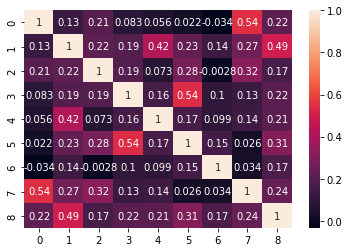

In [ ]:
# Heatmap
sns.heatmap(data1.corr(), annot = True)
plt.show()

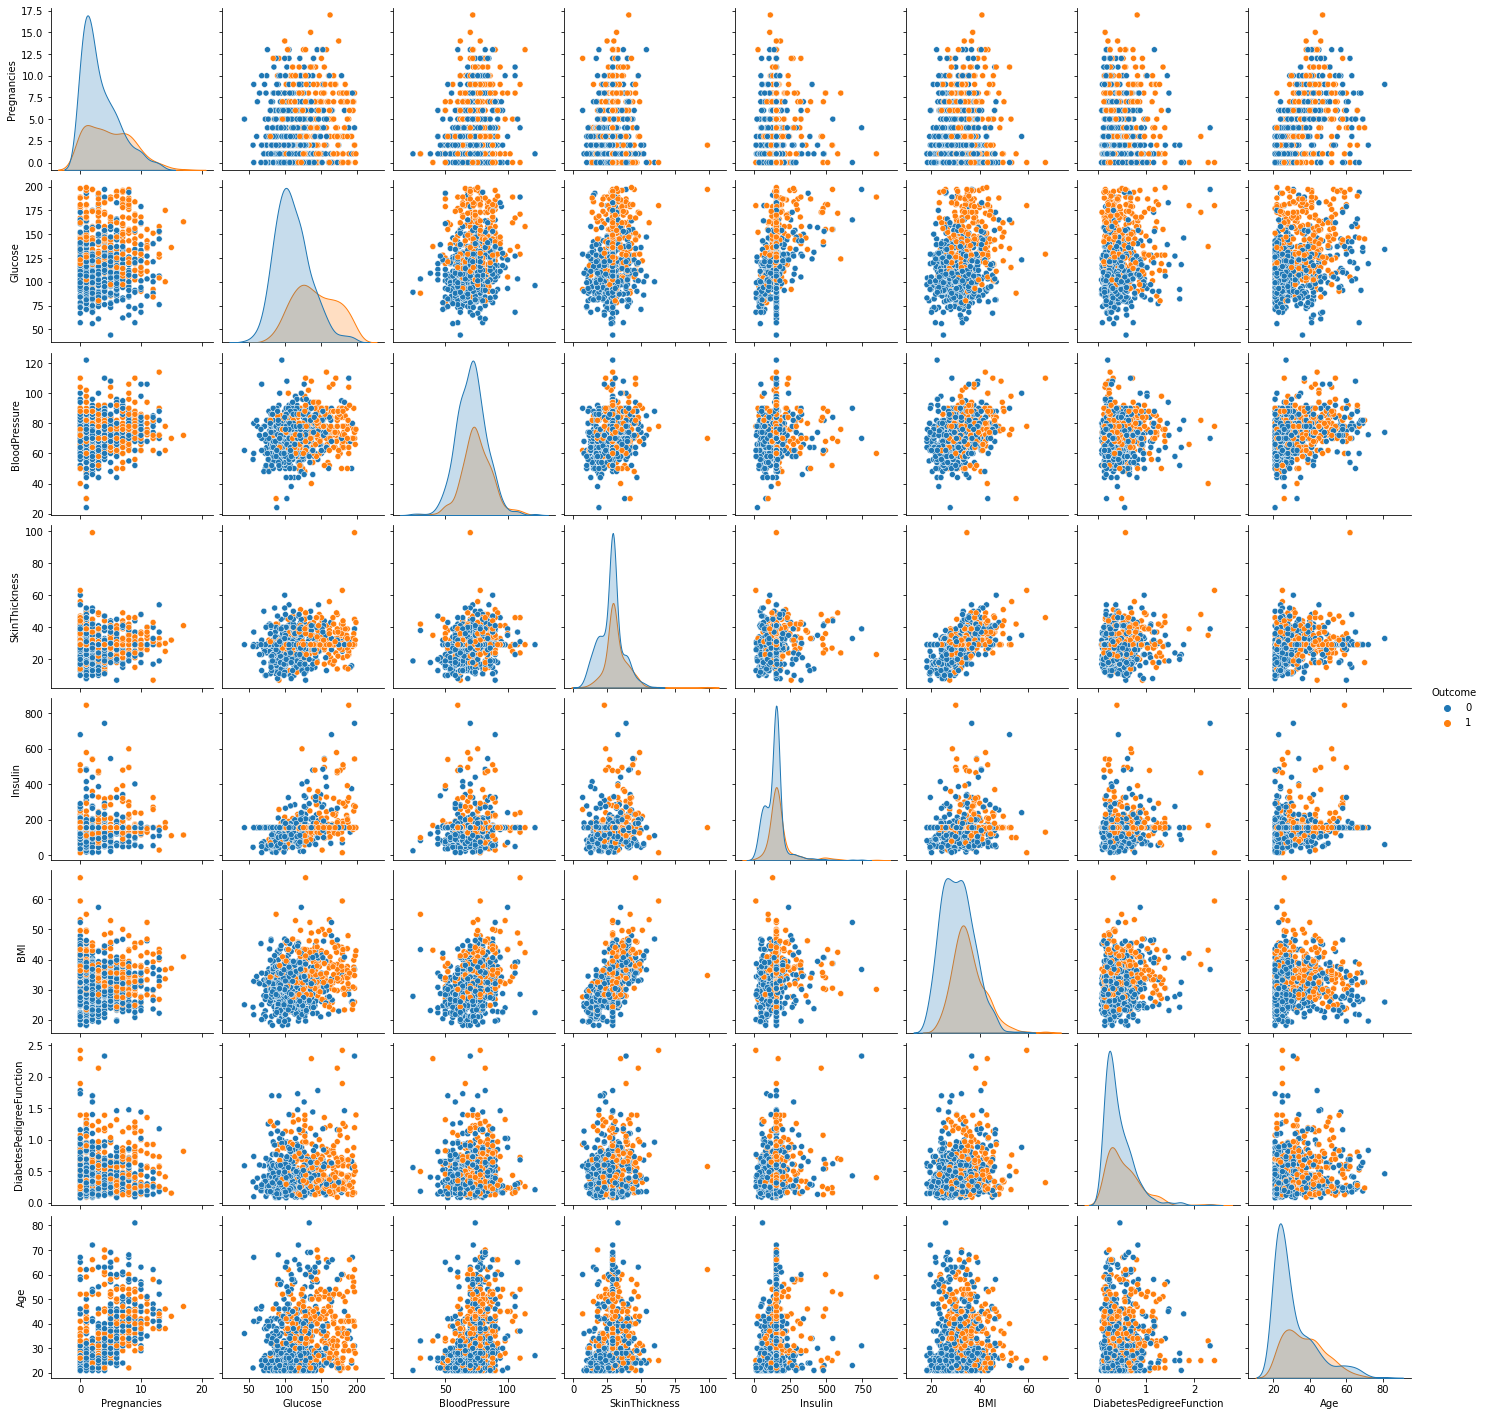

In [ ]:
# Detailed distribution of the features in the dataset
sns.pairplot(data=data, hue='Outcome')
plt.show()

#Hierarchical Clustering

: (1) identify the two clusters that are closest together, and (2) merge the two most similar clusters. This iterative process continues until all the clusters are merged together

In [ ]:
data3 = data.drop('Outcome', axis = 1)
data3

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0       35.00000  155.548223  33.6   
1              1     85.0           66.0       29.00000  155.548223  26.6   
2              8    183.0           64.0       29.15342  155.548223  23.3   
3              1     89.0           66.0       23.00000   94.000000  28.1   
4              0    137.0           40.0       35.00000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0       48.00000  180.000000  32.9   
764            2    122.0           70.0       27.00000  155.548223  36.8   
765            5    121.0           72.0       23.00000  112.000000  26.2   
766            1    126.0           60.0       29.15342  155.548223  30.1   
767            1     93.0           70.0       31.00000  155.548223  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
4                       2.288   33  
..                        ...  ...  
763                     0.171   63  
764                     0.340   27  
765                     0.245   30  
766                     0.349   47  
767                     0.315   23  

[768 rows x 8 columns]

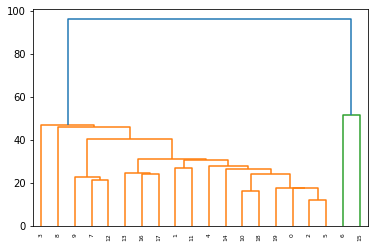

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

merg = linkage(data3.iloc[200:220,:],method = 'single')
dendrogram(merg, leaf_rotation = 90, leaf_font_size = 6)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=2, affinity="euclidean",linkage="ward")
cluster = hc.fit_predict(data3)
data3['Label'] = cluster
data3

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0       35.00000  155.548223  33.6   
1              1     85.0           66.0       29.00000  155.548223  26.6   
2              8    183.0           64.0       29.15342  155.548223  23.3   
3              1     89.0           66.0       23.00000   94.000000  28.1   
4              0    137.0           40.0       35.00000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0       48.00000  180.000000  32.9   
764            2    122.0           70.0       27.00000  155.548223  36.8   
765            5    121.0           72.0       23.00000  112.000000  26.2   
766            1    126.0           60.0       29.15342  155.548223  30.1   
767            1     93.0           70.0       31.00000  155.548223  30.4   

     DiabetesPedigreeFunction  Age  Label  
0                       0.627   50      0  
1                       0.351   31      0  
2                       0.672   32      0  
3                       0.167   21      0  
4                       2.288   33      0  
..                        ...  ...    ...  
763                     0.171   63      0  
764                     0.340   27      0  
765                     0.245   30      0  
766                     0.349   47      0  
767                     0.315   23      0  

[768 rows x 9 columns]

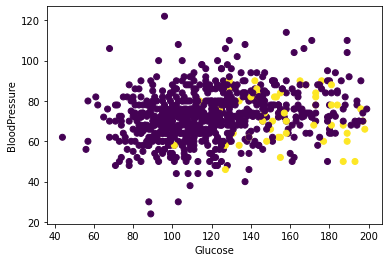

In [ ]:
plt.scatter(data3['Glucose'], data3['BloodPressure'], c = cluster)
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')
plt.show()

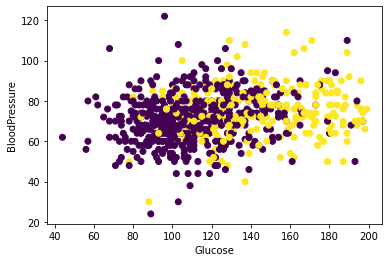

In [ ]:
plt.scatter(data['Glucose'], data['BloodPressure'], c = data['Outcome'])
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')
plt.show()

In [ ]:
data3['Outcome'] = data['Outcome']
data3

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0       35.00000  155.548223  33.6   
1              1     85.0           66.0       29.00000  155.548223  26.6   
2              8    183.0           64.0       29.15342  155.548223  23.3   
3              1     89.0           66.0       23.00000   94.000000  28.1   
4              0    137.0           40.0       35.00000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0       48.00000  180.000000  32.9   
764            2    122.0           70.0       27.00000  155.548223  36.8   
765            5    121.0           72.0       23.00000  112.000000  26.2   
766            1    126.0           60.0       29.15342  155.548223  30.1   
767            1     93.0           70.0       31.00000  155.548223  30.4   

     DiabetesPedigreeFunction  Age  Label  Outcome  
0                       0.627   50      0        1  
1                       0.351   31      0        0  
2                       0.672   32      0        1  
3                       0.167   21      0        0  
4                       2.288   33      0        1  
..                        ...  ...    ...      ...  
763                     0.171   63      0        0  
764                     0.340   27      0        0  
765                     0.245   30      0        0  
766                     0.349   47      0        1  
767                     0.315   23      0        0  

[768 rows x 10 columns]

In [ ]:
# We compare our labels results with base data's result.
correct = []
for i in range(0,767):
    if data3['Label'][i] == data3['Outcome'][i]:
        correct.append(1)
    else:
        correct.append(0)
correct[0:10] # -> if we find correctly 1, if not 0

[0, 1, 0, 1, 0, 1, 0, 1, 1, 0]

In [ ]:
print("Hierarchical Clustering Accuracy : ", (correct.count(1)/data3['Label'].size)*100)

Hierarchical Clustering Accuracy :  65.49479166666666


#Interpretation

 1. There are a total of 768 records and 9 features in the dataset.
    2. Each feature can be either of integer or float dataype.
    3. Some features like Glucose, Blood pressure , Insulin, BMI have zero values which represent missing data.
    4. There are zero NaN values in the dataset.
    5. In the outcome column, 1 represents diabetes positive and 0 represents diabetes negative.
  6. The countplot tells us that the dataset is imbalanced, as number of patients who don't have diabetes is more than those who do.
  7. From the correaltion heatmap, we can see that there is a high correlation between Outcome and [Glucose,BMI,Age]. We can select these features to accept input from the user and predict the outcome.
  

Merits and demerits of hierarchical clustering over k means clustering.


Advanatges:

•Hierarchical	clustering	outputs	a	hierarchy,	ie	a	structure	that	is	more	informaHve	than the	unstructured	set	of	flat	clusters	returned	by	k-means.

Therefore,	it	is	easier	to	decide	on	the	number	of	clusters	by	looking	at	the	dendrogram.

• Easy	to	implement	as applicable to any attributes types.

Disadvantages	
• It	is	not	possible	to	undo	the	previous	step:	once	the	instances	have	been	assigned	to	a	cluster,	they	can	no	longer	be	moved	around.		

• Time	complexity:	not	suitable	for	large	datasets	

• Initial	seeds	have	a	strong	impact	on	the	final	results	

• The	order	of	the	data	has	an	impact	on	the	final	results	

• Very	sensitive	to	outliers

#Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/diabetes.csv')

In [ ]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
print("Dataset has {} rows and {} columns ". format(df.shape[0], df.shape[1]))

Dataset has 768 rows and 9 columns 


In [ ]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
df.size

6912

#Checking for null or missing values

In [ ]:
df.nunique(axis=0)

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There is no null or missing values therefore no need to fill the missing values using any central tendencies(mean, median, mode)
Note: if the dataset is not normally distributed(distplot) then use median to fill the missing values

#Checking for class imbalance

In [ ]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

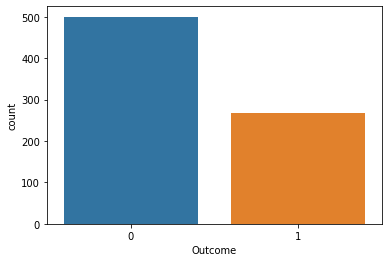

In [ ]:
sns.countplot(x='Outcome', data=df)
#Slight imbalance in dataset is observed using countplot

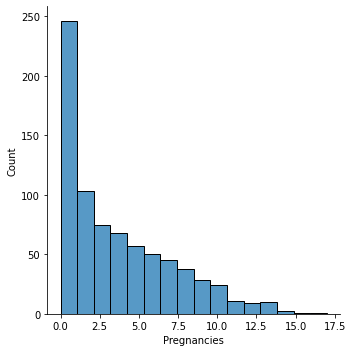

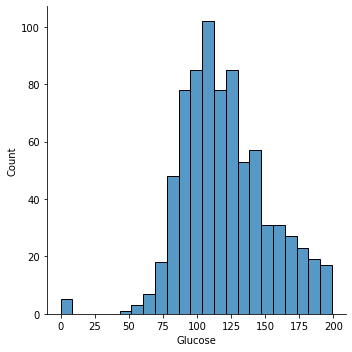

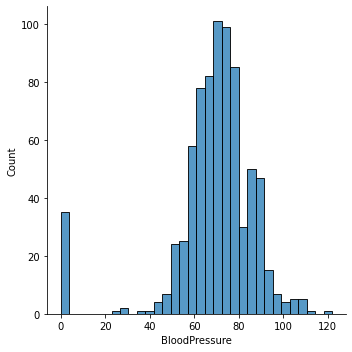

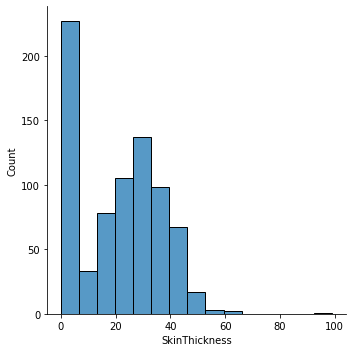

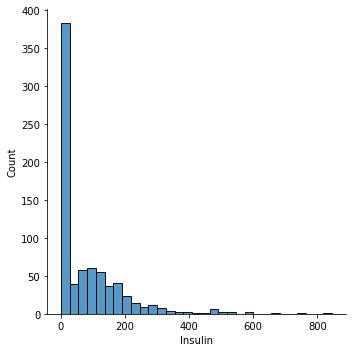

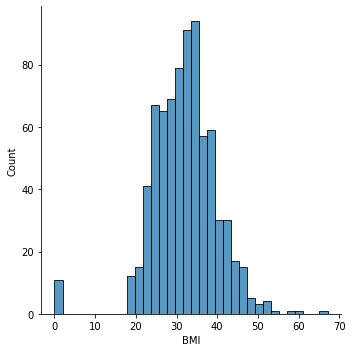

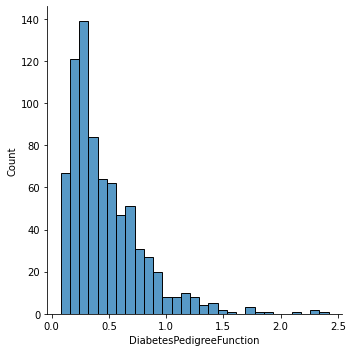

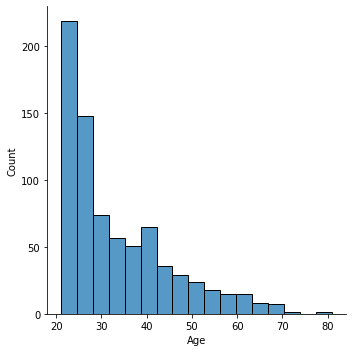

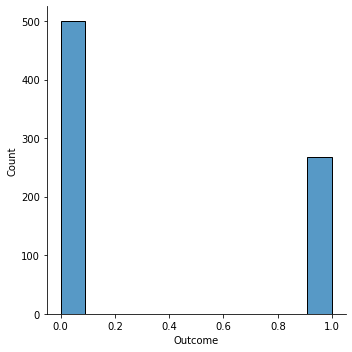

In [ ]:
# creating a for loop to get the distribution plot for all columns
for column in df:
  sns.displot(x=column, data=df)


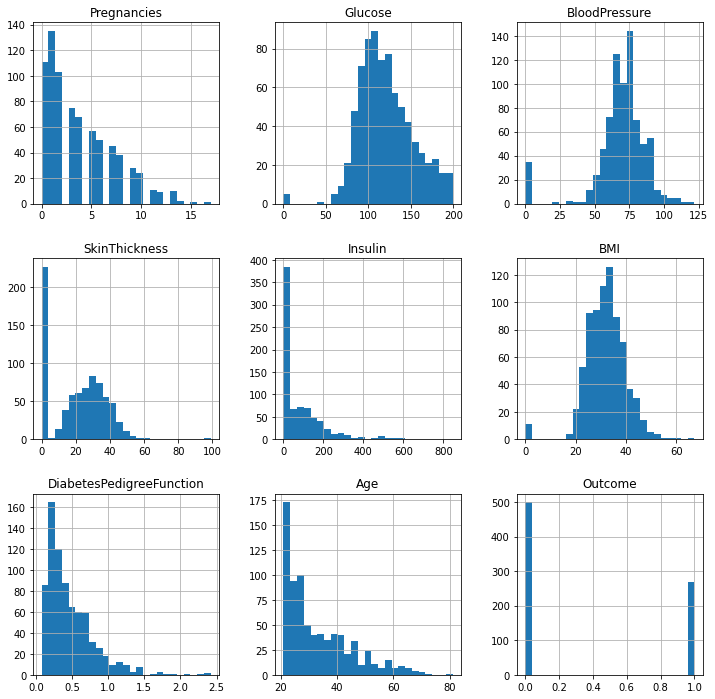

In [ ]:

# plotting histogram of all availble columns in the dataset to visualise data. 
axList = df.hist(bins=25, figsize = (12, 12))

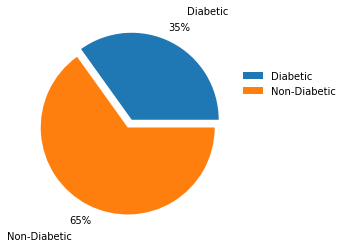

In [ ]:
fig, ax = plt.subplots()

labels = ['Diabetic', 
         'Non-Diabetic']
percentages = [34.89, 65.10]
explode=(0.1,0)
ax.pie(percentages, explode=explode, labels=labels, autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

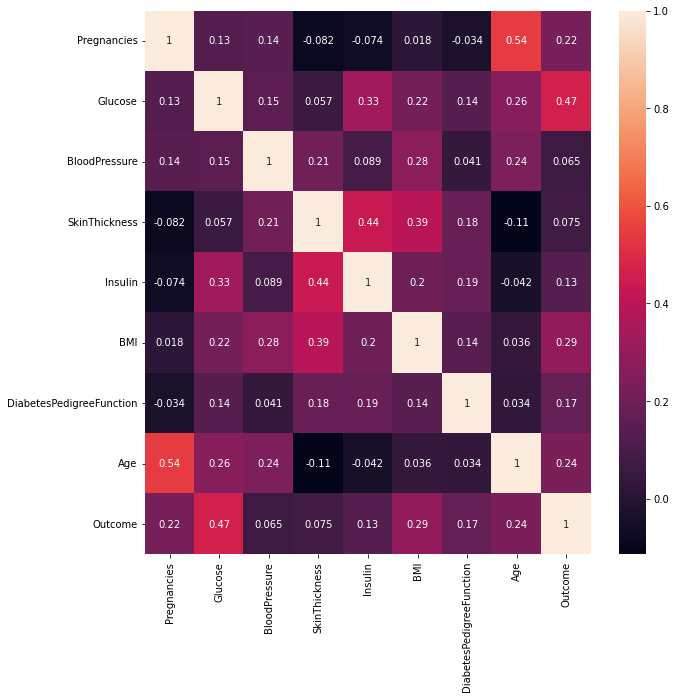

In [ ]:
# heatmap with the help of correlated data 
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

**Inference from EDA & Data Visualization:** 
1. No missing Values
2. All are continuous numerical values except for Outcome column
3. Mean is slightly more than the median for most of the features. So it is right skewed.
4. Slight imbalance in the dataset ( cases for non diabetic and diabetic category)
5. Most of the features have Outliers
7. Correlation Matrix reveal that bloodpressure and insulin are positive correlated whereas bmi and cholestral are positively correlated.


#Decision Tree

In [ ]:
#feature variables
x=df.drop(['Outcome'], axis=1)
x

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
4                       2.288   33  
..                        ...  ...  
763                     0.171   63  
764                     0.340   27  
765                     0.245   30  
766                     0.349   47  
767                     0.315   23  

[768 rows x 8 columns]

In [ ]:
#target variable
y=df.Outcome
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
# Create Decision Tree classifer object
model = DecisionTreeClassifier()

# Train Decision Tree Classifer
model = model.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)

In [ ]:
#Evaluation using Accuracy score
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 70.77922077922078


In [ ]:
#Evaluation using Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[79, 20],
       [25, 30]])

In [ ]:
print("Accuracy:",((82+27)/154))

Accuracy: 0.7077922077922078


In [ ]:
#Evaluation using Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78        99
           1       0.60      0.55      0.57        55

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.70      0.71      0.70       154



In [ ]:
#Import modules for Visualizing Decision trees
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

In [ ]:
features=x.columns
features

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

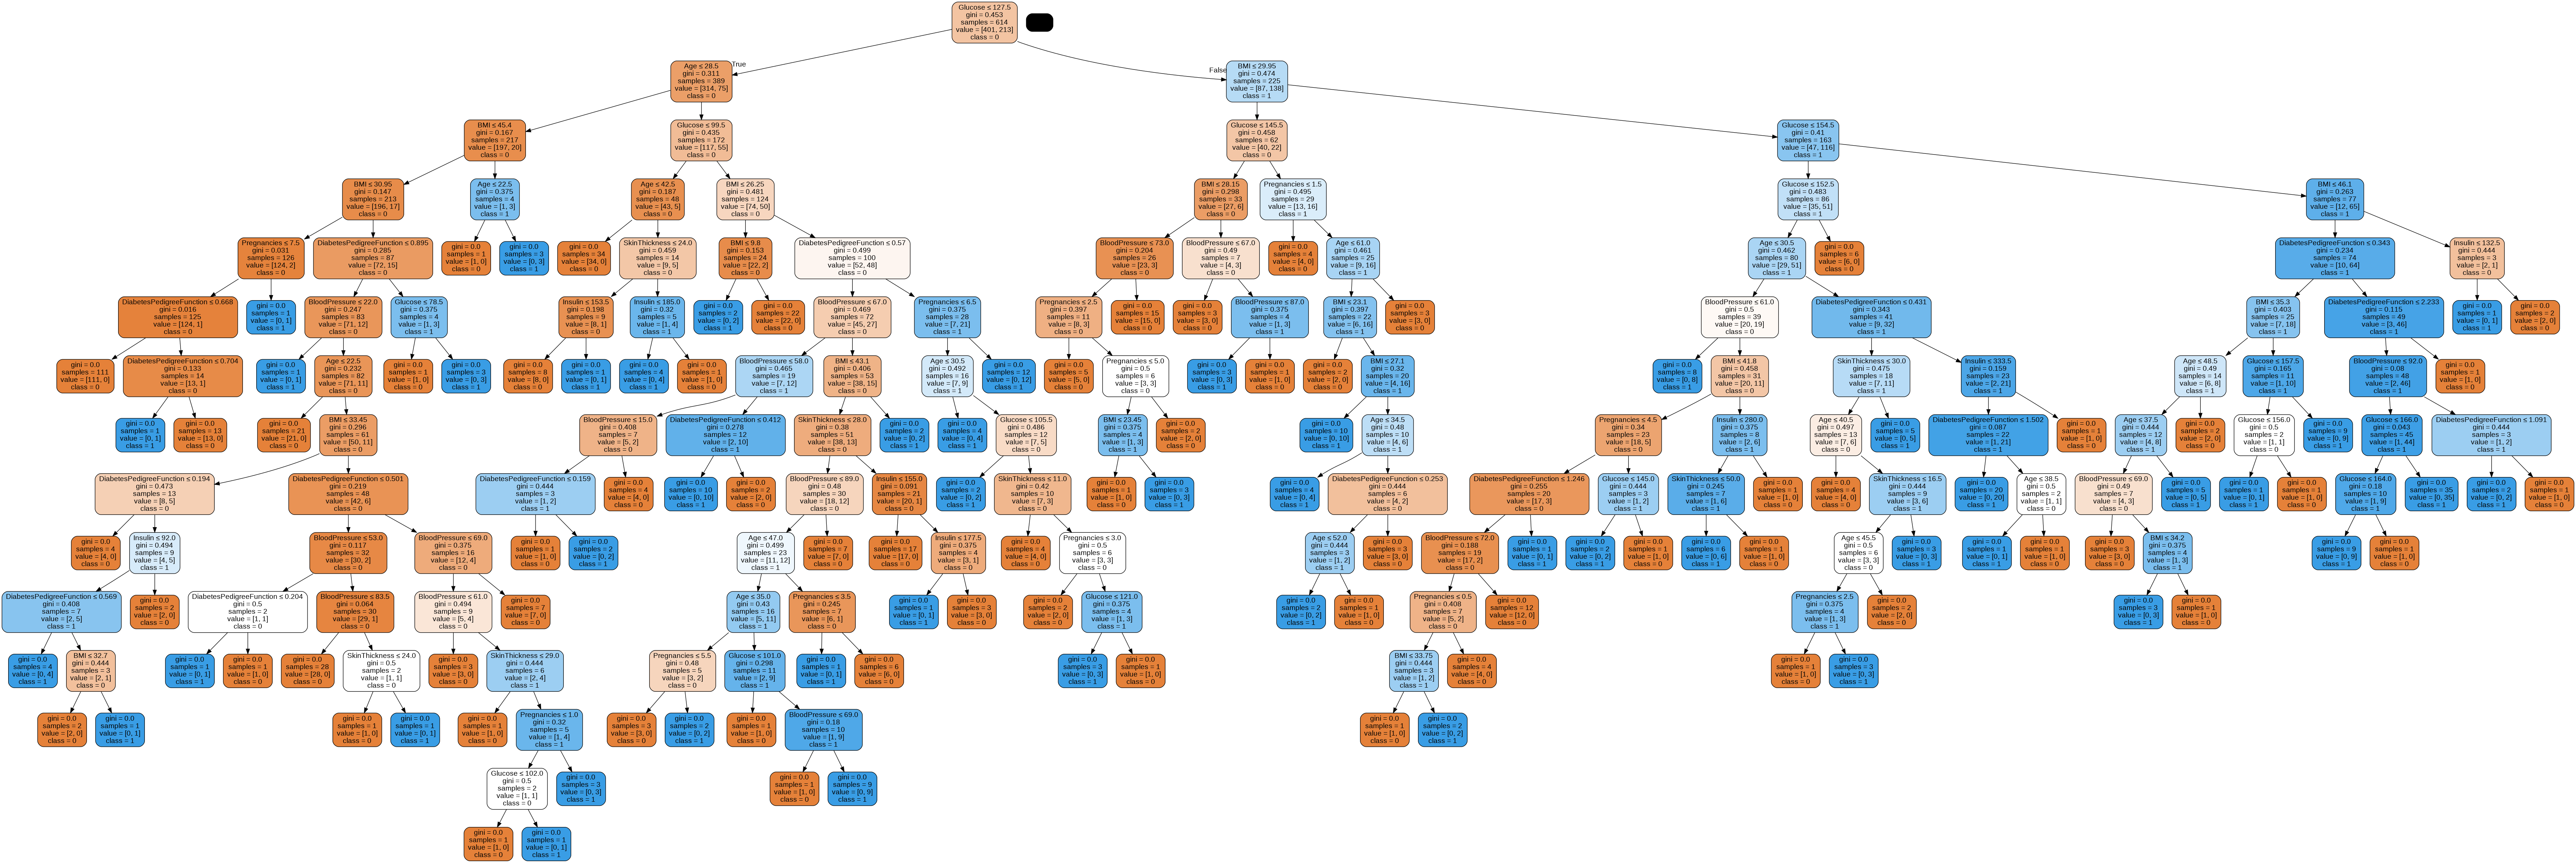

In [ ]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,filled=True, rounded=True,special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes_set.png')
Image(graph.create_png())

In [ ]:
# Create Decision Tree classifer object
model = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
model = model.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 79.87012987012987


The classification rate increased to 79.87%, which is better accuracy than the previous model.



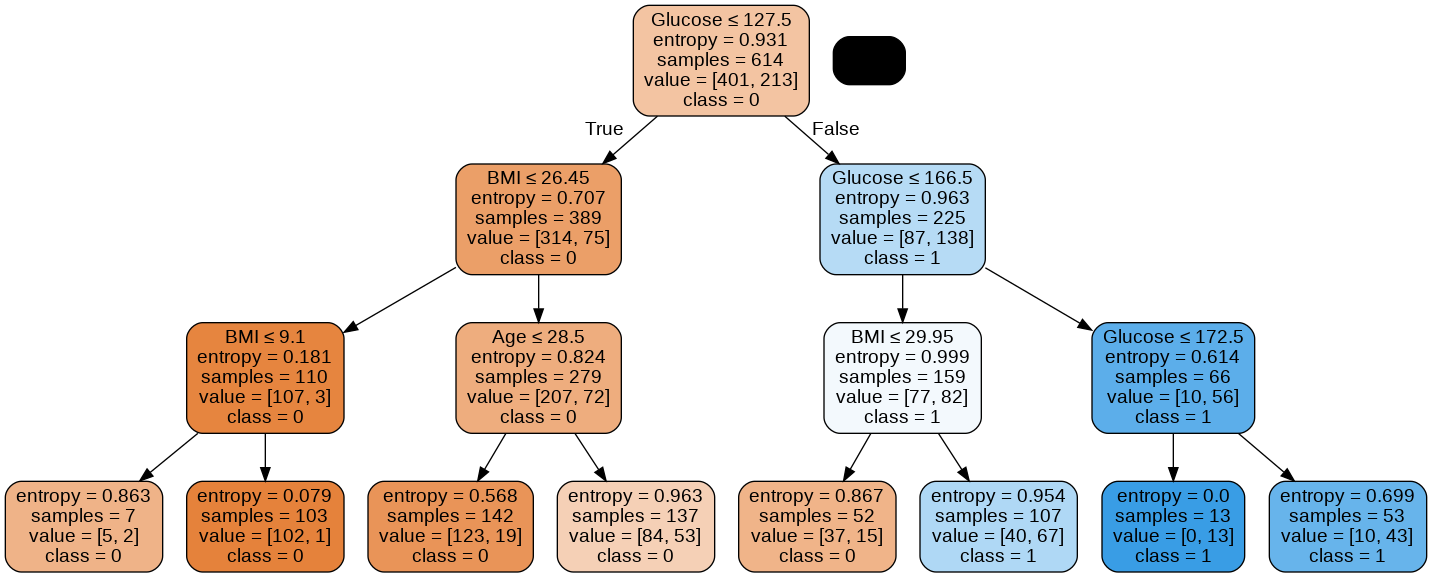

In [ ]:
#Better Decision Tree Visualisation
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,filled=True, rounded=True,special_characters=True, feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes_set.png')
Image(graph.create_png())

#Intrepretation


Using Decision Tree Classifier we have got 79% accuracy 

Decision tree can be used in both classification and regression
Easy to intrepret


Regression

In [ ]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
diabetes = datasets.load_diabetes()
print(diabetes.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [ ]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [ ]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [ ]:
# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

In [ ]:
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

In [ ]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


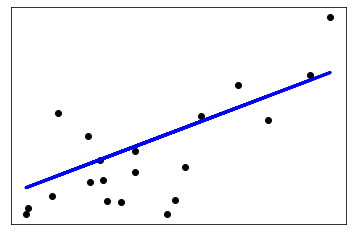

In [ ]:
#Scatter Plot
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

#Logistic Regression

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
df = pd.read_csv("/content/hcvdat0.csv")
df.head()

Unnamed: 0       Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  \
0           1  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   7.5   6.93   
1           2  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   3.9  11.17   
2           3  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   6.1   8.84   
3           4  0=Blood Donor   32   m  43.2  52.0  30.6  22.6  18.9   7.33   
4           5  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   9.6   9.15   

   CHOL   CREA   GGT  PROT  
0  3.23  106.0  12.1  69.0  
1  4.80   74.0  15.6  76.5  
2  5.20   86.0  33.2  79.3  
3  4.74   80.0  33.8  75.7  
4  4.32   76.0  29.9  68.7

In [ ]:
df["Category1"]=df["Category"].astype("category").cat.codes

In [ ]:
df["Sex1"]=df["Sex"].astype("category").cat.codes

In [ ]:
df.head()

Unnamed: 0       Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  \
0           1  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   7.5   6.93   
1           2  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   3.9  11.17   
2           3  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   6.1   8.84   
3           4  0=Blood Donor   32   m  43.2  52.0  30.6  22.6  18.9   7.33   
4           5  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   9.6   9.15   

   CHOL   CREA   GGT  PROT  Category1  Sex1  
0  3.23  106.0  12.1  69.0          0     1  
1  4.80   74.0  15.6  76.5          0     1  
2  5.20   86.0  33.2  79.3          0     1  
3  4.74   80.0  33.8  75.7          0     1  
4  4.32   76.0  29.9  68.7          0     1

In [ ]:
#Extracting Independent and dependent Variable  
x= df.iloc[:, [2,7]].values  
y= df.iloc[:, -1].values 

In [ ]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.56


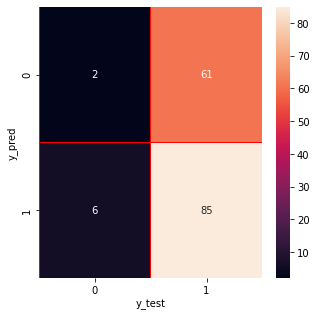

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  

import seaborn as sns 
f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.25      0.03      0.06        63
           1       0.58      0.93      0.72        91

    accuracy                           0.56       154
   macro avg       0.42      0.48      0.39       154
weighted avg       0.45      0.56      0.45       154



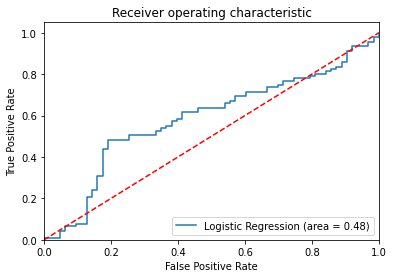

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Advantages
Logistic regression is easier to implement, interpret, and very efficient to train.
It is very fast at classifying unknown records.
Logistic regression is less inclined to over-fitting but it can overfit in high dimensional datasets.
It can easily extend to multiple classes(multinomial regression)

Disadvantages
If the number of observations is lesser than the number of features, Logistic Regression should not be used, otherwise, it may lead to overfitting.
It constructs linear boundaries.
The major limitation of Logistic Regression is the assumption of linearity between the dependent variable and the independent variables.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

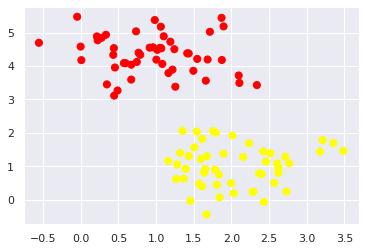

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

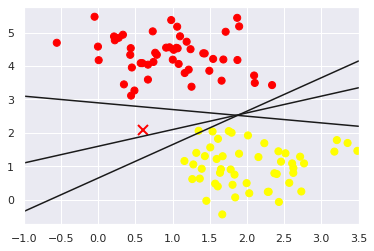

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

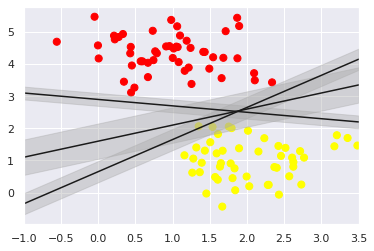

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

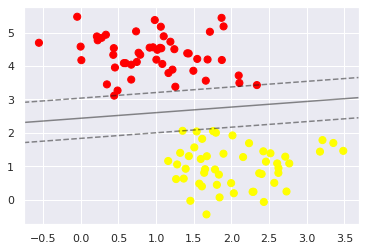

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [ ]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [1.35139348, 2.06383637]])

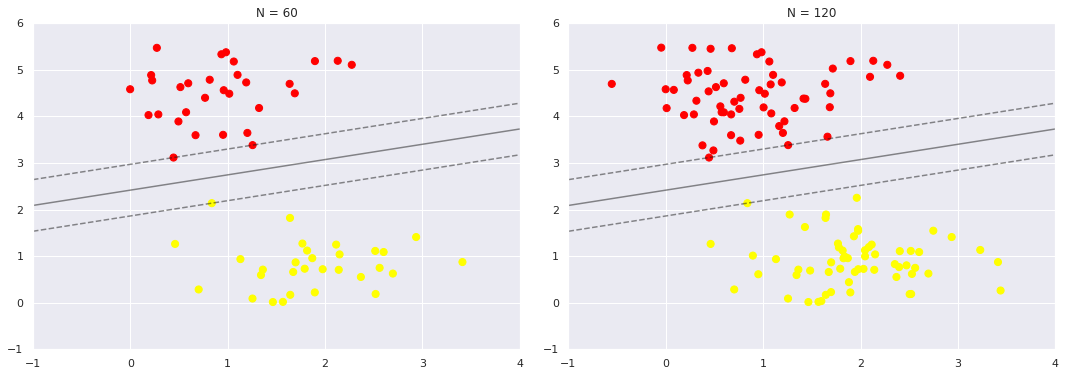

In [ ]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

Inference:

 Leftly we see the model and the support vectors for 60 training points rightly we have doubled the number of training points, but the model has not changed
 
Three support vectors from the left panel are still the support vectors from the right panel. This insensitivity to the exact behavior of distant points is one of the strengths of the SVM model.


Advantages
SVM works relatively well when there is a clear margin of separation between classes.
SVM is more effective in high dimensional spaces.
SVM is effective in cases where the number of dimensions is greater than the number of samples.
SVM is relatively memory efficient

Disadvantages
SVM algorithm is not suitable for large data sets.
SVM does not perform very well when the data set has more noise i.e. target classes are overlapping.
In cases where the number of features for each data point exceeds the number of training data samples, the SVM will underperform.


MLP (Multi Layer Perceptron) Classifier is the feedforward artificial neural network implementation of Scikit-Learn library.

MLPClassifier is used to predict whether a patient has diabetes based on a set of diagnostics.

Outline of the work is as follows:

* Load Data
* Split Data
* Visualization and Outlier Check
* Standardization
* Correlation Analysis
* Feature Importance
* Train MLP
* Test MLP

In [ ]:
import numpy as np
import itertools
import os
import pandas as pd
import seaborn as sea

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import RFE

import xgboost as xgb
from xgboost import plot_importance

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [ ]:
sea.set_style("darkgrid")

## Load Data

Pima Indians Diabetes dataset is used.

In [ ]:
data = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/"
                   "diabetes.csv")

data.head(10).style.set_precision(2). \
                    set_properties(**{"min-width": "60px"}). \
                    set_properties(**{"color": "#111111"}). \
                    set_properties(**{"text-align": "center"}). \
                    set_table_styles([
                          {"selector": "th",
                           "props": [("font-weight", "bold"),
                                     ("font-size", "12px"),
                                     ("text-align", "center")]},
                          {"selector": "tr:nth-child(even)",
                           "props": [("background-color", "#f2f2f2")]},
                          {"selector": "tr:nth-child(odd)",
                           "props": [("background-color", "#fdfdfd")]},
                          {"selector": "tr:hover",
                           "props": [("background-color", "#bcbcbc")]}])

There are 8 features and Outcome is the target variable.

* Pregnancies
* Glucose
* BloodPressure
* SkinThickness
* Insulin
* BMI (Body mass index)
* DiabetesPedigreeFunction
* Age

Features are assigned to data_X and corresponding labels to data_Y. Pandas info shows column (feature) data types and number of non-null values.

In [ ]:
# disable SettingWithCopyWarning messages
pd.options.mode.chained_assignment = None

data_X = data.loc[:, data.columns != "Outcome"]
data_Y = data[["Outcome"]]

print("data_X info:\n")
data_X.info()
print("\ndata_Y info:\n")
data_Y.info()

data_X info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB

data_Y info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Outcome  768 non-null    int64
dtypes: int64(1)
memory usage: 6.1 KB


Dataset has 768 rows (training samples). All features are numeric. And it seems there aren't any missing values. Here, one point requires extra attention. In your dataset, missing values may be encoded other than **NaN** or **NA**. For example, if you go and change some cells in dataset to **Na** or **NAN** and load it again and check info, **Pandas** won't recognize them as null values. So, **Pandas** may not detect these cells as missing. In our case, dataset is small and a short visual inspection reveals no missing values. But there is another point. Some cells may be encoded with an unlikely input. For example, 0 may indicate a missing value for a numeric feature. We will return this issue later.

Number of classes and their distribution is inspected in below cell.

In [ ]:
data_Y["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

There are two classes as expected, a patient has diabetes or doesn't have.

## Split Data

Dataset is divided into train and test sets. We use stratify parameter of train_test_split function to get the same class distribution across train and test sets.

In [ ]:
train_X, test_X, train_Y, test_Y = train_test_split(data_X, data_Y,
                                                    test_size=0.2,
                                                    stratify=data_Y,
                                                    random_state=0)

train_X.reset_index(drop=True, inplace=True);
test_X.reset_index(drop=True, inplace=True);
train_Y.reset_index(drop=True, inplace=True);
test_Y.reset_index(drop=True, inplace=True);

## Visualization and Outlier Check

Outliers degrade the learning performance. Outlier analysis is performed for each feature one-by-one. We use quartile analysis for outlier detection. For each feature, there are two plots below. Distribution of feature is on the left. Box plot of the same feature is on the right. Both of them are analyzed together to get an idea about the outliers. From this point on, lower whisker of the boxplot is denoted as LW and upper whisker is denoted as UW.

In order to draw a boxplot, feature data is divided into four. Three cut points are needed. These points are lower quartile (or first quartile), median (or second quartile) and upper quartile (or third quartile). First quartile is the median of the data lower than second quartile. Third quartile is the median of the data greater than the second quartile. Interquartile range (IQR) is found subtracting lower quartile from upper quartile. Outliers are determined using lower, upper quartiles and IQR.

In [ ]:
def plots(feature):
    fig = plt.figure(constrained_layout = True, figsize=(10,3))
    gs = gridspec.GridSpec(nrows=1, ncols=4, figure=fig)

    ax1 = fig.add_subplot(gs[0,:3])    
    sea.distplot(train_X.loc[train_Y["Outcome"]==0,feature],
                 kde = False, color = "#004a4d", norm_hist=False,
                 hist_kws = dict(alpha=0.8), bins=40,
                 label="Not Diabetes", ax=ax1);
    sea.distplot(train_X.loc[train_Y["Outcome"]==1,feature],
                 kde = False, color = "#7d0101", norm_hist=False,
                 hist_kws = dict(alpha=0.6), bins=40,
                 label="Diabetes", ax=ax1);
    ax2 = fig.add_subplot(gs[0,3])    
    sea.boxplot(train_X[feature], orient="v", color = "#989100",
                width = 0.2, ax=ax2);
    
    ax1.legend(loc="upper right");

### Feature 0 - Pregnancies

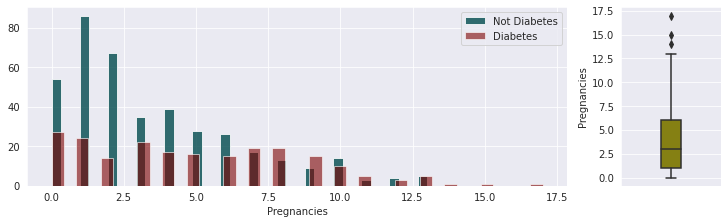

In [ ]:
plots("Pregnancies")

For Pregnancies feature, there are some measurements above upper whisker. These are rare events. We replace them with 95th quantile.

In [ ]:
Q1 = train_X["Pregnancies"].quantile(0.25)
Q3 = train_X["Pregnancies"].quantile(0.75)
q95th = train_X["Pregnancies"].quantile(0.95)
IQR = Q3 - Q1
UW = Q3 + 1.5*IQR

train_X["Pregnancies"] = np.where(train_X["Pregnancies"] > UW,
                                  q95th, train_X["Pregnancies"])

### Feature 1 - Glucose

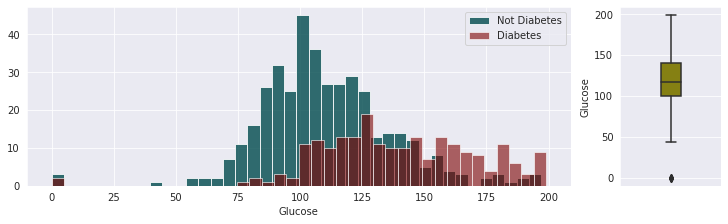

In [ ]:
plots("Glucose")

There are some 0 values for **Glucose**. We can deem 0 values as placeholder for missing data. So we replace them with median.

In [ ]:
med = train_X["Glucose"].median()
train_X["Glucose"] = np.where(train_X["Glucose"] == 0, med, train_X["Glucose"])

### Feature 2 - BloodPressure

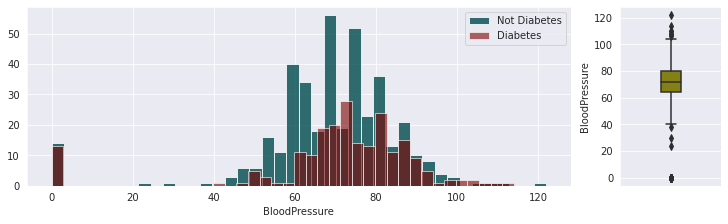

In [ ]:
plots("BloodPressure")

There are some 0 values for **BloodPressure** which is unlikely. So we replace them with median. Also, we replace values lower than LW (except zeros) with 5th quantile and replace values greater than UW with 95th quantile.

In [ ]:
med = train_X["BloodPressure"].median()
q5th = train_X["BloodPressure"].quantile(0.05)
q95th = train_X["BloodPressure"].quantile(0.95)
Q1 = train_X["BloodPressure"].quantile(0.25)
Q3 = train_X["BloodPressure"].quantile(0.75)
IQR = Q3 - Q1
LW = Q1 - 1.5*IQR
UW = Q3 + 1.5*IQR

train_X["BloodPressure"] = np.where(train_X["BloodPressure"] == 0,
                                    med, train_X["BloodPressure"])
train_X["BloodPressure"] = np.where(train_X["BloodPressure"] < LW,
                                    q5th, train_X["BloodPressure"])
train_X["BloodPressure"] = np.where(train_X["BloodPressure"] > UW,
                                    q95th, train_X["BloodPressure"])

### Feature 3 - SkinThickness

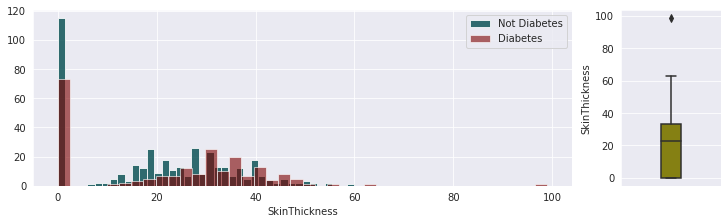

In [ ]:
plots("SkinThickness")

There are some 0 values for **SkinThickness** which is unlikely. So we replace them with median. Also, we replace values greater than UW with 95th quantile.

In [ ]:
med = train_X["SkinThickness"].median()
q95th = train_X["SkinThickness"].quantile(0.95)
Q1 = train_X["SkinThickness"].quantile(0.25)
Q3 = train_X["SkinThickness"].quantile(0.75)
IQR = Q3 - Q1
UW = Q3 + 1.5*IQR

train_X["SkinThickness"] = np.where(train_X["SkinThickness"] == 0,
                                    med, train_X["SkinThickness"])
train_X["SkinThickness"] = np.where(train_X["SkinThickness"] > UW,
                                    q95th, train_X["SkinThickness"])

### Feature 4 - Insulin

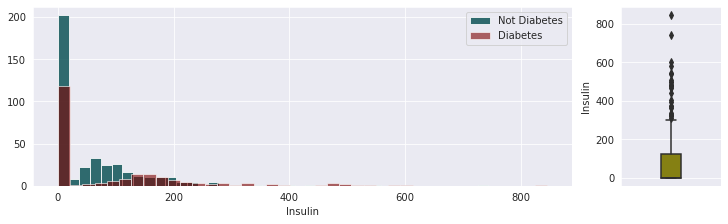

In [ ]:
plots("Insulin")

There are some 0 values for **Insulin** which is unlikely. So we replace them with 60th quantile becuse median is 0. Also, we replace values greater than UW with 95th quantile.

In [ ]:
q60th = train_X["Insulin"].quantile(0.60)
q95th = train_X["Insulin"].quantile(0.95)
Q1 = train_X["Insulin"].quantile(0.25)
Q3 = train_X["Insulin"].quantile(0.75)
IQR = Q3 - Q1
UW = Q3 + 1.5*IQR

train_X["Insulin"] = np.where(train_X["Insulin"] == 0,
                              q60th, train_X["Insulin"])
train_X["Insulin"] = np.where(train_X["Insulin"] > UW,
                              q95th, train_X["Insulin"])

### Feature 5 - BMI

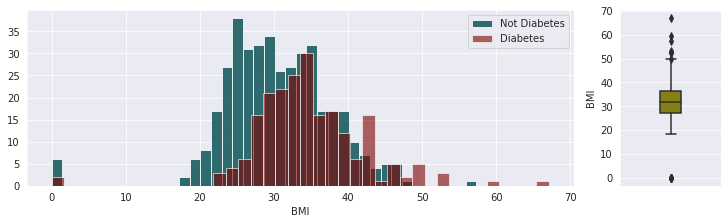

In [ ]:
plots("BMI")

There are some 0 values for **BMI**. We replace them with median. Also, we replace values greater than UW with q95th.

In [ ]:
med = train_X["BMI"].median()
q95th = train_X["BMI"].quantile(0.95)
Q1 = train_X["BMI"].quantile(0.25)
Q3 = train_X["BMI"].quantile(0.75)
IQR = Q3 - Q1
UW = Q3 + 1.5*IQR

train_X["BMI"] = np.where(train_X["BMI"] == 0,
                          med, train_X["BMI"])
train_X["BMI"] = np.where(train_X["BMI"] > UW,
                          q95th, train_X["BMI"])

### Feature 6 - DiabetesPedigreeFunction

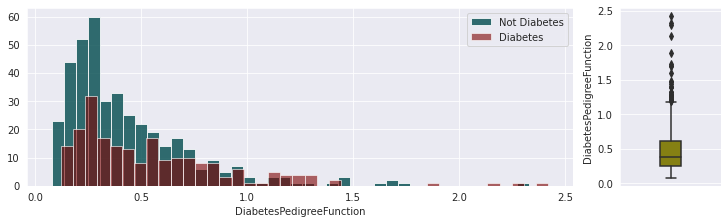

In [ ]:
plots("DiabetesPedigreeFunction")

We replace values greater than UW with 95th quantile.

In [ ]:
q95th = train_X["DiabetesPedigreeFunction"].quantile(0.95)
Q1 = train_X["DiabetesPedigreeFunction"].quantile(0.25)
Q3 = train_X["DiabetesPedigreeFunction"].quantile(0.75)
IQR = Q3 - Q1
UW = Q3 + 1.5*IQR

train_X["DiabetesPedigreeFunction"] = np.where(
                        train_X["DiabetesPedigreeFunction"] > UW,
                        q95th, train_X["DiabetesPedigreeFunction"])

### Feature 7 - Age

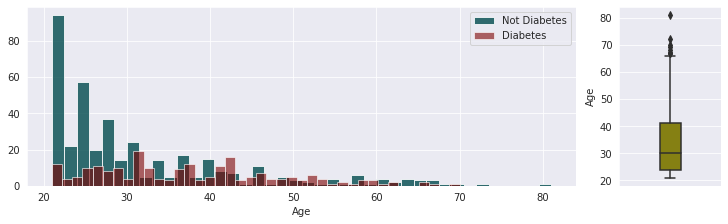

In [ ]:
plots("Age")

There are some measurements above UW due to rare events. We replace them with 95th quantile.

In [ ]:
q95th = train_X["Age"].quantile(0.95)
Q1 = train_X["Age"].quantile(0.25)
Q3 = train_X["Age"].quantile(0.75)
IQR = Q3 - Q1
UW = Q3 + 1.5*IQR

train_X["Age"] = np.where(train_X["Age"] > UW,
                          q95th, train_X["Age"])

## Standardization

To increase the learning performance, input features are standardized. Mean and standard deviation of the feature are computed. Then, mean is subtracted from each sample of the feature and result is divided by standard deviation. The aim is to transform the feature to have mean of 0 and standard deviation of 1. **StandardScaler** of **scikit-learn** is used. A **StandardScaler** is fit to the feature in **train_X**, then this scaler transforms the same feature in **train_X** and **test_X**.

In [ ]:
feature_names = train_X.columns

scaler = StandardScaler()

# fit to train_X
scaler.fit(train_X)

# transform train_X
train_X = scaler.transform(train_X)
train_X = pd.DataFrame(train_X, columns = feature_names)

# transform test_X
test_X = scaler.transform(test_X)
test_X = pd.DataFrame(test_X, columns = feature_names)

## Correlation Analysis

Linear correlations between features and also between features and output are computed. **Pandas corr** function is used to compute correlation matrix and **Seaborn heatmap** is used for plotting.

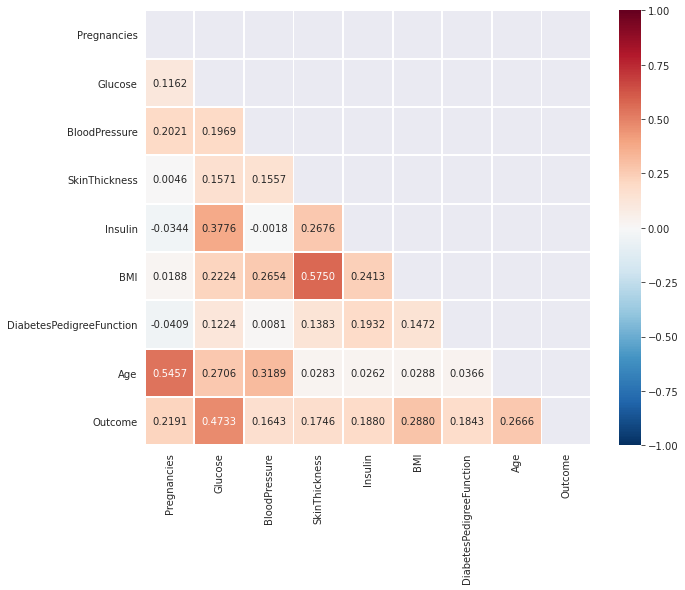

In [ ]:
corr_matrix = pd.concat([train_X, train_Y], axis=1).corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))

plt.figure(figsize=(10,8))
sea.heatmap(corr_matrix,annot=True, fmt=".4f",
            vmin=-1, vmax=1, linewidth = 1,
            center=0, mask=mask,cmap="RdBu_r");

Correlation matrix shows that there are mild correlations between **SkinThickness-BMI** and **Age-Pregnancies**. **Outcome** has the highest linear correlation with **Glucose**.

## Feature Importance

Feature importance analysis methods can be divided into 3 broad categories:

* Filter method: Calculating a metric like correlation coefficient between each feature and output separately as we did above. In this method all features are evaluated independently.

* Embedded methods: Methods like logistic regression or linear regression learn the coefficients that multiply each feature. The magnitude of the coefficients are associated with the importance of the features. Also, tree based methods like random forests or gradient tree boosting learn feature importances during training process. In embedded methods, all features are evaluated jointly.

* Wrapper methods: Basically you have an estimator and you train this estimator with the subsets of features. The subset giving the best score is selected and other features are eliminated.

In [ ]:
# logistic regression with l1 penalty - embedded method
lr1 = LogisticRegression(random_state=0, penalty="l1",
            class_weight="balanced", solver="saga", max_iter=5000)
lr1.fit(train_X, train_Y.values.ravel())

lr1.coef_

array([[ 3.60358322e-01,  1.06754141e+00, -2.50971359e-02,
        -9.81326043e-05, -6.49737080e-02,  5.74505582e-01,
         3.35113887e-01,  2.71385240e-01]])

In [ ]:
# logistic regression with l2 penalty - embedded method
lr2 = LogisticRegression(random_state=0, penalty="l2",
            class_weight="balanced", solver="saga", max_iter=5000)
lr2.fit(train_X, train_Y.values.ravel())

lr2.coef_

array([[ 0.36506112,  1.07199682, -0.04073014, -0.01616834, -0.07560637,
         0.59537491,  0.34399744,  0.28125417]])

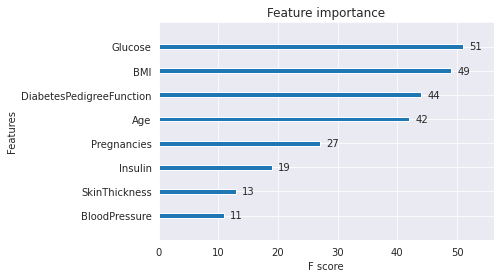

In [ ]:
# xgboost - embedded method
gb = xgb.XGBClassifier(booster="gbtree",
                      learning_rate=0.15,
                      max_depth=4,
                      n_estimators=20,
                      random_state=0)
gb.fit(train_X, train_Y.values.ravel())

plot_importance(gb);

In [ ]:
# recursive feature elimination with logistic regression - wrapper method
lr3 = LogisticRegression(random_state=0, penalty="l2",
            class_weight="balanced", solver="saga", max_iter=5000)
rfe_lr3 = RFE(lr3, n_features_to_select=7)
rfe_lr3.fit(train_X, train_Y.values.ravel())

print(rfe_lr3.support_)

[ True  True  True False  True  True  True  True]


First three analysis mark BloodPressure, SkinThickness and Insulin as the least important features. Note that these features have very low correlation with Outcome. RFE marks SkinThickness as the least important.

In [ ]:
train_X.drop("SkinThickness", axis=1, inplace=True)
test_X.drop("SkinThickness", axis=1, inplace=True)

## Train MLP

MLPClassifier with single hidden layer is used for diabetes prediction.

In [ ]:
clf = MLPClassifier(solver="adam", max_iter=5000, activation = "relu",
                    hidden_layer_sizes = (12),                      
                    alpha = 0.01,
                    batch_size = 64,
                    learning_rate_init = 0.001,
                    random_state=2)

clf.fit(train_X, train_Y.values.ravel());

## Test MLP

In [ ]:
print(classification_report(test_Y, clf.predict(test_X),
                            digits = 4,
                            target_names=["Not Diabetes",
                                          "Diabetes"]))

              precision    recall  f1-score   support

Not Diabetes     0.8624    0.9400    0.8995       100
    Diabetes     0.8667    0.7222    0.7879        54

    accuracy                         0.8636       154
   macro avg     0.8645    0.8311    0.8437       154
weighted avg     0.8639    0.8636    0.8604       154



Backpropagation is an algorithm for supervised learning of artificial neural networks that uses the gradient descent method to minimize the cost function. It searches for optimal weights that optimize the mean-squared distance between the predicted and actual labels.



BPN learns in an iterative manner. In each iteration, it compares training examples with the actual target label. target label can be a class label or continuous value. The backpropagation algorithm works in the following steps:

Initialize Network: BPN randomly initializes the weights. 

Forward Propagate: After initialization, we will propagate into the forward direction. In this phase, we will compute the output and calculate the error from the target output.

Back Propagate Error: For each observation, weights are modified in order to reduce the error in a technique called the delta rule or gradient descent. It modifies weights in a “backward” direction to all the hidden layers.

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
# Load dataset
data = load_iris()

# Get features and target
X=data.data
y=data.target

In [ ]:
# Get dummy variable 
y = pd.get_dummies(y).values

y[:3]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [ ]:
#Split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=4)

In [ ]:
# Initialize variables
learning_rate = 0.1
iterations = 5000
N = y_train.size

# number of input features
input_size = 4

# number of hidden layers neurons
hidden_size = 2 

# number of neurons at the output layer
output_size = 3  

results = pd.DataFrame(columns=["mse", "accuracy"])

In [ ]:
# Initialize weights
np.random.seed(10)

# initializing weight for the hidden layer
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))   

# initializing weight for the output layer
W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size)) 

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)
    
def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()

In [ ]:
for itr in range(iterations):    
    
    # feedforward propagation
    # on hidden layer
    Z1 = np.dot(X_train, W1)
    A1 = sigmoid(Z1)

    # on output layer
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)
    
    
    # Calculating error
    mse = mean_squared_error(A2, y_train)
    acc = accuracy(A2, y_train)
    results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
    
    # backpropagation
    E1 = A2 - y_train
    dW1 = E1 * A2 * (1 - A2)

    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)

    
    # weight updates
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(X_train.T, dW2) / N

    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update

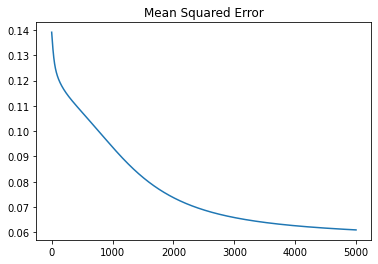

In [ ]:
results.mse.plot(title="Mean Squared Error")

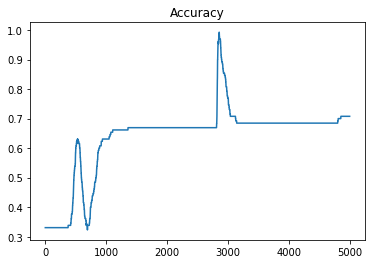

In [ ]:
results.accuracy.plot(title="Accuracy")

#Intrepretation
Backpropagation Neural Network is a simple and faster model compared to its earlier models. It is also a flexible and standard method. It does not need any prior knowledge for training. 

BPN performance depends upon the kind of input data is used. It is quite sensitive to noisy data. We need to use a matrix-based approach instead of a mini-batch. 

Backpropagation neural network is a method to optimize neural networks by propagating the error or loss into a backward direction. It finds loss for each node and updates its weights accordingly in order to minimize the loss using gradient descent. 

